In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
one_hot_df = pd.read_csv('Data/allData/PrisonAdmissionsCleanOneHotEncoding.csv')

In [260]:
# code from https://blog.gitnux.com/code/python-colormap/

pie_colors = ["#002473","#ee9b00", "#91080c", "#431a51", "#0A85BA", "#07403a", "#bb3e03","#1d085b","#9b2226","#7d176c","#ca6702", "#e7d498",  "#0d5f5c", "#001219"]
color_map = ["#002473", "#0A85BA", "#ee9b00", "#7d176c", "#5b1427","#e7d498",  "#07403a", "#d15400", "#1d085b", "#91080c","#431a51", "#bb3e03",  "#DFA591", "#BD0058"]

font = {'fontname':'helvetica'}

def create_custom_colormap(colors, positions=None):
    if positions is None:
        positions = np.linspace(0, 1, len(colors))
    return LinearSegmentedColormap.from_list("", list(zip(positions, colors)))

cmap = create_custom_colormap(color_map)


/var/folders/v1/ljzyxbgj1xx_syzq56dgnsk00000gn/T/ipykernel_6087/3044552049.py:48: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 4)
/var/folders/v1/ljzyxbgj1xx_syzq56dgnsk00000gn/T/ipykernel_6087/3044552049.py:52: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 5)
/var/folders/v1/ljzyxbgj1xx_syzq56dgnsk00000gn/T/ipykernel_6087/3044552049.py:56: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 6)


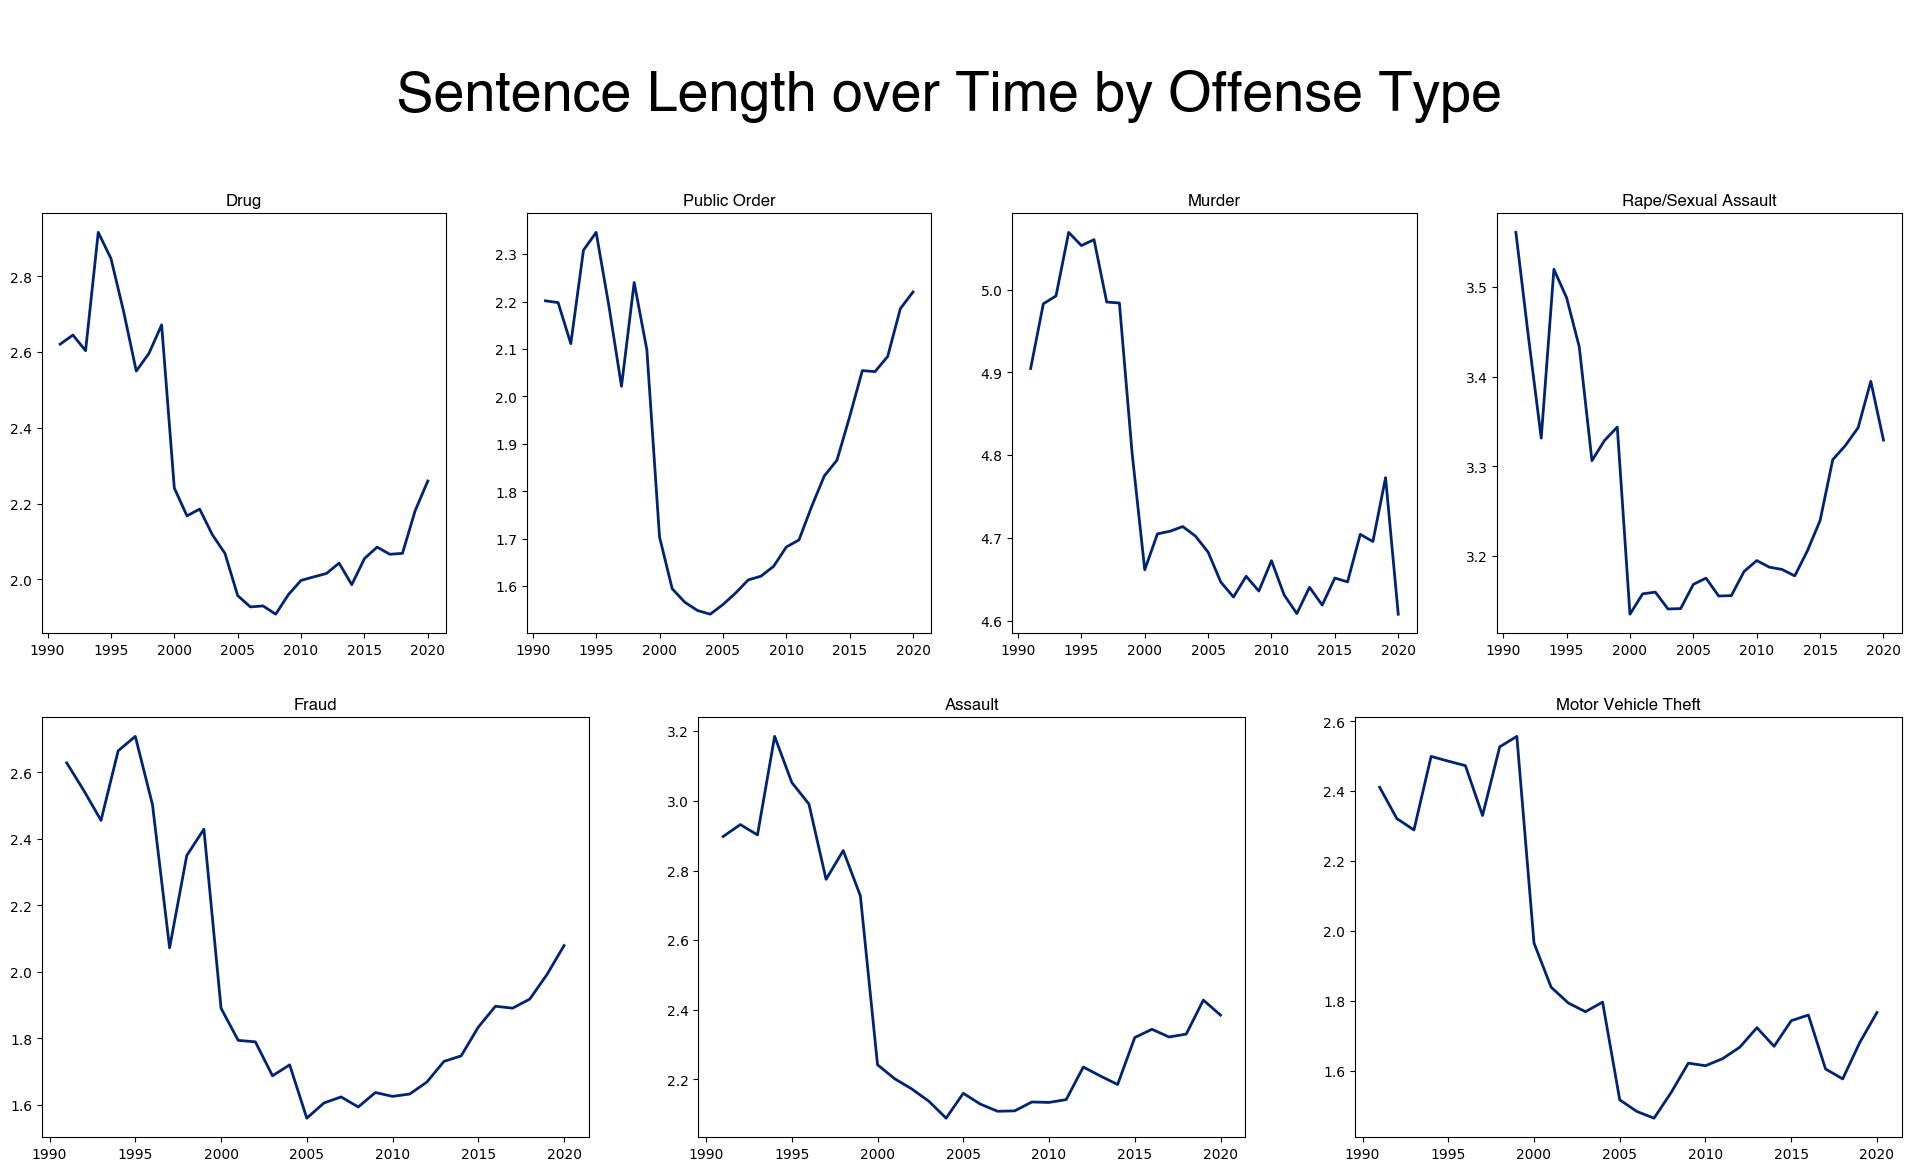

In [121]:
years = []
drug_sent = []
publicorder_sent = []
murder_sent = []
rape_sent = [] 
fraud_sent = []
assault_sent = [] 
motor_theft_sent = []

# function that, given an offense and year, compute the average sentence length 
def avg_sentence(offense, year):
    year_data = one_hot_df[one_hot_df['ADMITYR'] == year]
    offense_data = year_data[year_data[offense] == 1]
    avg_sent_len = offense_data['SENTLGTH'].mean()
    return avg_sent_len

# iterate through each year and compute average sentence length 
year_df = one_hot_df['ADMITYR'].unique()
year_df.sort()
for year in year_df:
    years.append(year)
    drug_sent.append(avg_sentence('drugs', year))
    publicorder_sent.append(avg_sentence('public order', year))
    murder_sent.append(avg_sentence('murder', year))
    rape_sent.append(avg_sentence('rape/SA', year))
    fraud_sent.append(avg_sentence('fraud', year))
    assault_sent.append(avg_sentence('assault', year))
    motor_theft_sent.append(avg_sentence('motor vehicle theft', year))

plt.subplots(2, 4, figsize=(24,12))

plt.subplot(2, 4, 1)
plt.plot(years, drug_sent, linewidth=2.0, color=pie_colors[0])
plt.title('Drug', **font)

plt.subplot(2, 4, 2)
plt.plot(years, publicorder_sent, linewidth=2.0, color=pie_colors[0])
plt.title('Public Order', **font)

plt.subplot(2, 4, 3)
plt.plot(years, murder_sent, linewidth=2.0, color=pie_colors[0])
plt.title('Murder', **font)

plt.subplot(2, 4, 4)
plt.plot(years, rape_sent, linewidth=2.0, color=pie_colors[0])
plt.title('Rape/Sexual Assault', **font)

plt.subplot(2, 3, 4)
plt.plot(years, fraud_sent, linewidth=2.0, color=pie_colors[0])
plt.title('Fraud', **font)

plt.subplot(2, 3, 5)
plt.plot(years, assault_sent, linewidth=2.0, color=pie_colors[0])
plt.title('Assault', **font)

plt.subplot(2, 3, 6)
plt.plot(years, motor_theft_sent, linewidth=2.0,color=pie_colors[0])
plt.title('Motor Vehicle Theft', **font)

plt.suptitle('\n Sentence Length over Time by Offense Type', y=1.05, **font, fontsize=40)
plt.savefig('Results/SentenceLengthOverTime.png', dpi=100, bbox_inches='tight')


In [261]:
# create a multicollinearity matrix, randomly sampling rows for efficiency purposes
# this helps us make sure there is low collinearity between the features we are observing 
new_one_hot_df = one_hot_df.sample(n=1000)
corr = new_one_hot_df.corr()
corr.style.background_gradient(cmap=cmap)

/var/folders/v1/ljzyxbgj1xx_syzq56dgnsk00000gn/T/ipykernel_6087/2804273941.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = new_one_hot_df.corr()
/usr/local/lib/python3.10/site-packages/pandas/io/formats/style.py:3925: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/site-packages/pandas/io/formats/style.py:3926: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,SEX,STATE,EDUCATION,OFFGENERAL,ADMITYR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AK,AL,AR,AZ,CA,CO,CT,DC,FL,GA,HI,IA,IL,IN,KS,KY,LA,MA,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NV,NY,OH,OK,PA,RI,SC,SD,TN,TX,UT,VA,WA,WI,WV,WY,black,hispanic,other,white,assault,burglary,drugs,fraud,larceny,motor vehicle theft,murder,negligent manslaugher,other property,other violent,public order,rape/SA,robbery,unspecified
SEX,1.000000,-0.003287,0.108167,0.025691,-0.040512,-0.112717,0.050968,-0.057840,0.008485,0.087340,0.046117,0.003007,-0.013575,-0.011461,-0.002950,nan,0.087340,-0.000559,0.004407,nan,-0.019011,-0.012204,-0.024583,0.026519,0.002000,nan,0.094329,nan,nan,-0.033041,0.019310,0.009994,-0.011461,0.032867,-0.016216,-0.025679,-0.011461,0.009538,-0.068432,nan,0.013564,0.019591,-0.001455,0.009898,-0.011461,0.014235,-0.009277,-0.030414,0.063954,-0.043165,0.007279,0.007042,nan,-0.021875,-0.037227,-0.019011,0.052305,-0.018065,-0.003003,0.019515,0.123179,0.110262,-0.007138,0.003584,0.018595,-0.034748,-0.044702,-0.038843,-0.089060,-0.052386,0.009994
STATE,-0.003287,1.000000,0.085358,-0.034642,0.154997,-0.022747,-0.040310,0.038704,0.030082,-0.056085,-0.202233,-0.292914,-0.345056,-0.048194,-0.270266,nan,-0.038330,-0.334239,-0.170423,nan,-0.087948,-0.243561,-0.156132,-0.041213,-0.094152,nan,-0.018572,nan,nan,-0.032076,-0.014568,-0.018054,-0.000848,0.107119,0.021130,0.002519,0.005070,0.014682,0.107882,nan,0.068482,0.149165,0.080633,0.199487,0.030715,0.175355,0.454785,0.097216,0.178495,0.167690,0.274015,0.123391,nan,0.042629,0.026176,-0.027418,-0.053791,0.069129,-0.040222,-0.024420,0.058733,-0.000059,0.015321,-0.008388,-0.001017,-0.085224,-0.066916,-0.002517,0.044238,0.007302,-0.004787
EDUCATION,0.108167,0.085358,1.000000,0.036373,0.142696,-0.069250,0.057672,-0.101233,0.175944,-0.029760,0.039836,-0.077550,-0.017791,0.019675,0.036301,nan,0.069111,-0.081315,-0.014783,nan,0.038178,-0.046356,0.004213,0.039410,0.039532,nan,0.005543,nan,nan,0.071967,-0.035858,-0.018991,0.019675,-0.041675,0.027839,-0.022374,0.069111,0.061314,-0.088115,nan,-0.025188,0.049785,-0.006916,-0.034997,0.019675,-0.008107,0.081659,-0.022752,-0.005013,0.034205,0.111231,-0.004011,nan,-0.067433,-0.061778,-0.000386,0.110021,0.014142,-0.054879,0.013236,0.095783,0.040636,-0.033929,-0.045228,-0.044527,-0.019242,-0.000386,0.015684,-0.008856,-0.045117,0.007607
OFFGENERAL,0.025691,-0.034642,0.036373,1.000000,0.002521,-0.193474,0.933065,0.007171,0.118680,0.047272,0.020668,-0.023440,0.069153,-0.011088,0.001584,nan,-0.040269,-0.002201,-0.000723,nan,0.078153,-0.040032,0.000858,-0.022210,0.014769,nan,-0.036089,nan,nan,-0.046277,0.035470,0.005338,0.047272,-0.038889,0.025598,-0.024844,0.047272,0.035462,-0.020966,nan,0.024915,0.025210,-0.013868,0.037511,-0.011088,0.029966,0.013388,-0.040488,-0.048775,-0.065312,-0.041401,0.003761,nan,-0.055190,0.029806,0.032627,0.025920,-0.405135,-0.120681,0.361906,-0.078697,-0.099796,-0.050067,-0.162297,-0.090224,-0.053774,-0.157064,0.652087,-0.312918,-0.382916,0.287937
ADMITYR,-0.040512,0.154997,0.142696,0.002521,1.000000,-0.099384,-0.012743,-0.010501,0.131410,-0.035786,-0.182928,0.063585,0.068531,0.002818,0.003458,nan,-0.051228,-0.235716,-0.076121,nan,0.035084,-0.018227,0.068996,0.052040,0.118207,nan,-0.046429,nan,nan,-0.045701,-0.108894,0.007498,0.037562,0.030271,-0.006937,-0.069802,-0.028066,0.030828,-0.121787,nan,-0.087802,0.103335,0.086009,-0.095186,0.014400,0.081684,0.228563,-0.084723,-0.004585,-0.002887,0.014524,0.027968,nan,-0.129160,0.067180,0.025045,0.075031,0.087034,-0.039090,-0.064863,-0.037079,-0.021889,-0.057871,0.024000,-0.094021,0.048668,0.013000,0.073156,0.034530,-0.014334,0.015806
SENTLGTH,-0.112717,-0.022747,-0.069250,-0.193474,-0.099384,1.000000,-0.261916,-0.014842,0.024482,0.060366,-0.001153,0.051764,-0.097832,0.060366,-0.020746,nan,0.016223,-0.014750,0.157894,nan,0.091971,-0.025155,-0.044449,-0.044873,0.037422,nan,0.091906,nan,nan,-0.051507,0.057472,0.078912,0.016223,-0.179455,-0.039506,-0.003214,-0.027921,0.024588,0.085400,nan,0.126592,0.116575,-0.084099,-0.0572

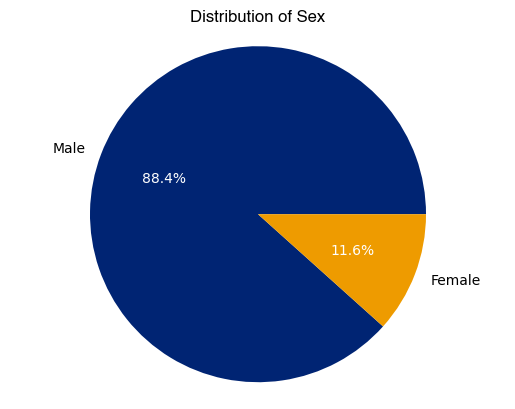

In [262]:
sex_col = one_hot_df['SEX']

# Get the value counts of the sex column
mapping = {
        1: 'Male',
        2: 'Female',
    }

sexStringCol = one_hot_df['SEX'].map(mapping)
sex_counts = sexStringCol.value_counts(sort=False)

# Create pie chart
fig, ax = plt.subplots()
ax.pie(sex_counts, labels=sexStringCol.unique(), autopct='%1.1f%%', colors=pie_colors)

# Set font color of percentage labels to white
for text in ax.texts:
    if '%' in text.get_text():
        text.set_color('white')

# Add title and set axis
plt.title('Distribution of Sex', **font)
plt.axis('equal')

# Save and display chart
plt.savefig('Results/SexDistrib.png', bbox_inches='tight')
plt.show()

# this isn't biased data, it's just the way men and women are distributed
# in the prison system. It says more about the prison suystem than the data

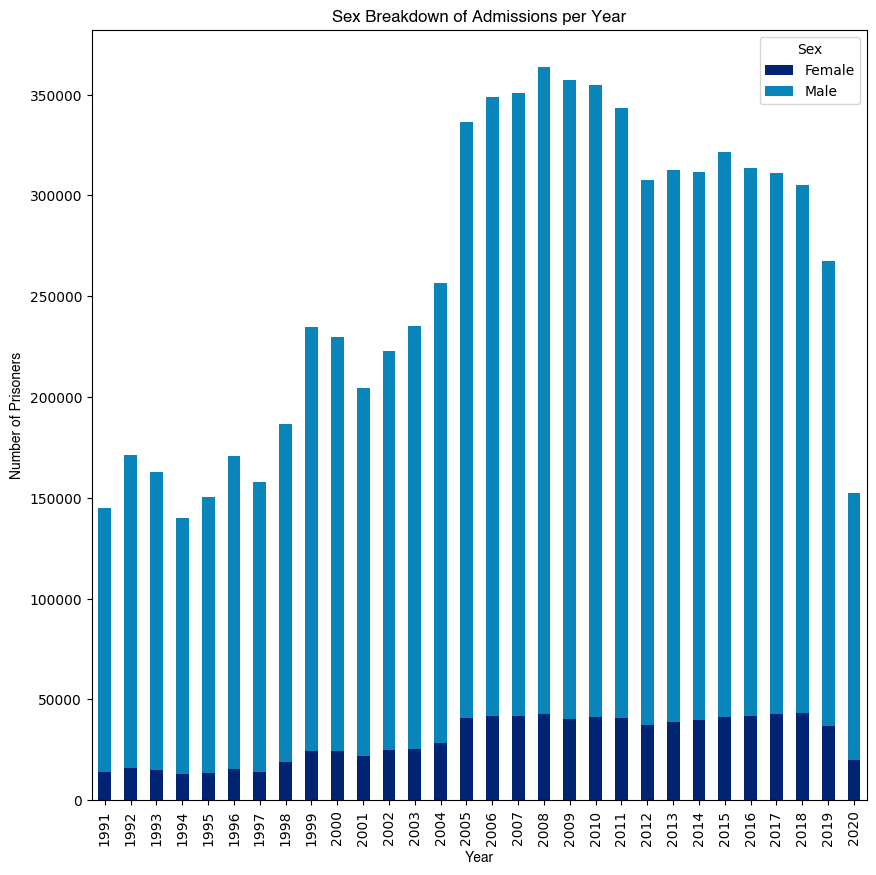

In [250]:
grouped = one_hot_df.groupby(['ADMITYR', 'SEX']).size().unstack(fill_value=0)

mapping = {
        1: 'Male',
        2: 'Female',
    }

one_hot_df['Sex'] = one_hot_df['SEX'].map(mapping)
# make the admit year values ints
one_hot_df['ADMITYR'] = one_hot_df['ADMITYR'].astype(int)

# Group the data by year and race
grouped = one_hot_df.groupby(['ADMITYR', 'Sex']).size().unstack(fill_value=0)

# Plot a stacked bar graph
grouped.plot(kind='bar', stacked=True, color=color_map, figsize=(10,10))

# Set the labels and title
# plt.figure(figsize=(8,8))
plt.xlabel('Year', **font)
plt.ylabel('Number of Prisoners', **font)
plt.title('Sex Breakdown of Admissions per Year', **font)

# Show the graph
plt.savefig('Results/SexPerYear', bbox_inches='tight')
plt.show()


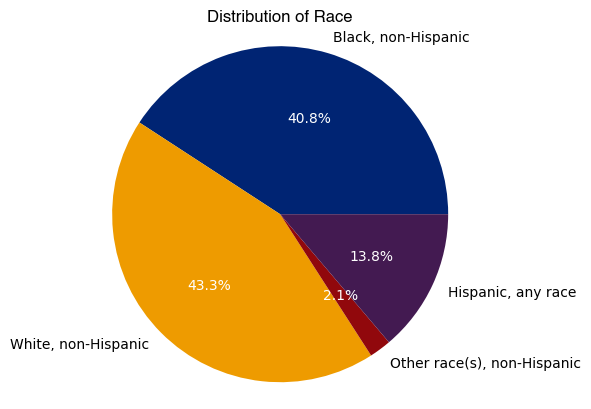

In [175]:
race_col = one_hot_df['RACE']

mapping = {
        1: 'White, non-Hispanic',
        2: 'Black, non-Hispanic',
        3: 'Hispanic, any race',
        4: 'Other race(s), non-Hispanic'
    }
raceStringCol = one_hot_df['RACE'].map(mapping)
race_counts = raceStringCol.value_counts(sort=False)

# Create a pie chart using matplotlib
fig, ax = plt.subplots()
ax.pie(race_counts, labels=raceStringCol.unique(), autopct='%1.1f%%', colors=pie_colors)

# make labels white
for text in ax.texts:
    if '%' in text.get_text():
        text.set_color('white')
        
plt.title('Distribution of Race', **font)
plt.axis('equal')
plt.savefig('Results/RaceDistrib', bbox_inches='tight')
plt.show()

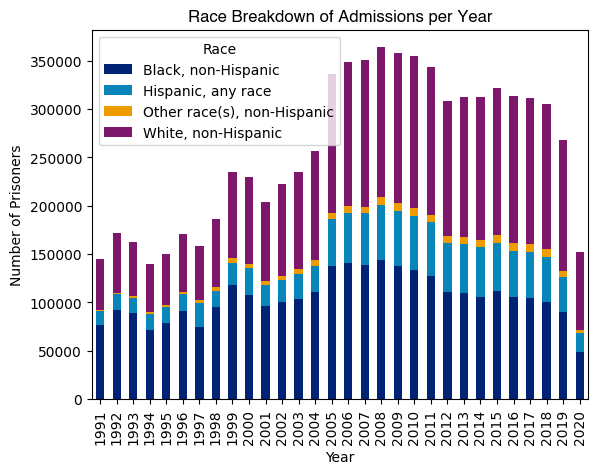

In [251]:

grouped = one_hot_df.groupby(['ADMITYR', 'RACE']).size().unstack(fill_value=0)

mapping = {
        1: 'White, non-Hispanic',
        2: 'Black, non-Hispanic',
        3: 'Hispanic, any race',
        4: 'Other race(s), non-Hispanic'
    }

one_hot_df['Race'] = one_hot_df['RACE'].map(mapping)
one_hot_df['ADMITYR'] = one_hot_df['ADMITYR'].astype(int)

# Group the data by year and race
grouped = one_hot_df.groupby(['ADMITYR', 'Race']).size().unstack(fill_value=0)


# Plot a stacked bar graph
grouped.plot(kind='bar', stacked=True, color=color_map)

# Set the labels and title
# plt.figure(figsize=(8,8))
plt.xlabel('Year')
plt.ylabel('Number of Prisoners')
plt.title('Race Breakdown of Admissions per Year', **font)
plt.savefig('Results/RacePerYear', bbox_inches='tight')
# Show the graph
plt.show()


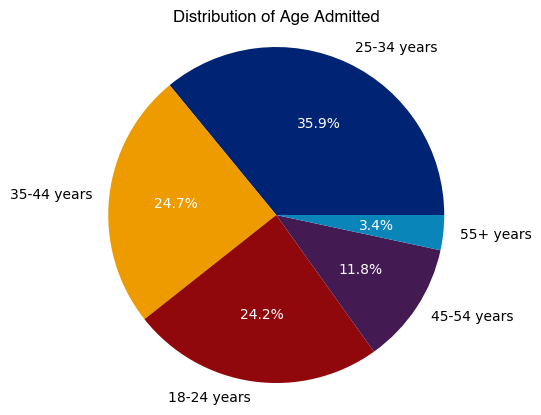

In [184]:
age_col = one_hot_df['AGEADMIT']
# Get the value counts of the sex column
mapping = {
        1: '18-24 years',
        2: '25-34 years',
        3: '35-44 years',
        4: '45-54 years',
        5: '55+ years'
    }


ageStringCol = one_hot_df['AGEADMIT'].map(mapping)
age_counts = ageStringCol.value_counts(sort=True, ascending=False)

# creating a list of offense labels in the same order as the sorted state counts
sortedMapping = age_counts.to_dict()
sortedMapping = dict(sorted(sortedMapping.items(), key=lambda x: -x[1]))

sortedLabels = list(sortedMapping.keys())

# Create a pie chart using matplotlib
fig, ax = plt.subplots()
ax.pie(age_counts, labels=sortedLabels, autopct='%1.1f%%', colors=pie_colors)

# make labqels white
for text in ax.texts:
    if '%' in text.get_text():
        text.set_color('white')

plt.title('Distribution of Age Admitted', **font)
plt.axis('equal')
plt.savefig('Results/AgeDistrib', bbox_inches='tight')
plt.show()

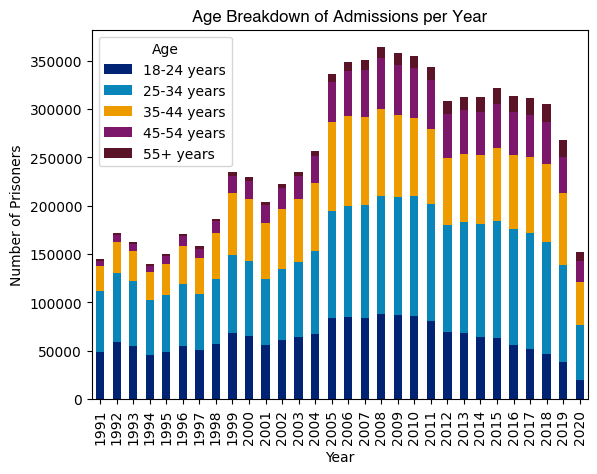

In [252]:
grouped = one_hot_df.groupby(['ADMITYR', 'AGEADMIT']).size().unstack(fill_value=0)

mapping = {
        1: '18-24 years',
        2: '25-34 years',
        3: '35-44 years',
        4: '45-54 years',
        5: '55+ years'
    }


one_hot_df['Age'] = one_hot_df['AGEADMIT'].map(mapping)
one_hot_df['ADMITYR'] = one_hot_df['ADMITYR'].astype(int)

# Group the data by year and race
grouped = one_hot_df.groupby(['ADMITYR', 'Age']).size().unstack(fill_value=0)

# Plot a stacked bar graph
grouped.plot(kind='bar', stacked=True, color = color_map)

# Set the labels and title
# plt.figure(figsize=(8,8))
plt.xlabel('Year')
plt.ylabel('Number of Prisoners')
plt.title('Age Breakdown of Admissions per Year', **font)
plt.savefig('Results/AgePerYear', bbox_inches='tight')
# Show the graph
plt.show()


HS diploma/GE      3297868
<HS diploma/GED    3835035
Any college         593775
Name: EDUCATION, dtype: int64


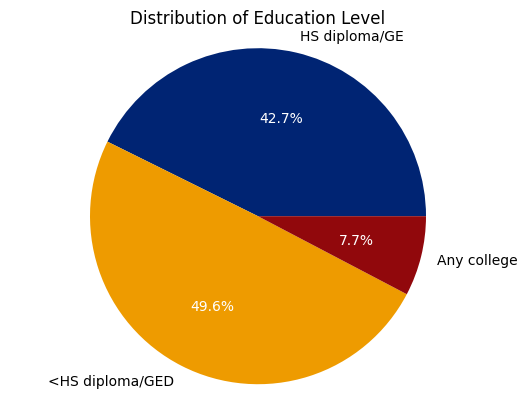

In [196]:
edu_col = one_hot_df['EDUCATION']
# Get the value counts of the sex column
mapping = {
        1: '<HS diploma/GED',
        2: 'HS diploma/GE', 
        3: 'Any college'
    }

eduStringCol = one_hot_df['EDUCATION'].map(mapping)
edu_counts = eduStringCol.value_counts(sort=False)
print(edu_counts)


# Create a pie chart using matplotlib
fig, ax = plt.subplots()
ax.pie(edu_counts, labels=eduStringCol.unique(), autopct='%1.1f%%', colors=pie_colors)
# make labqels white
for text in ax.texts:
    if '%' in text.get_text():
        text.set_color('white')
        if float(text.get_text()[:-1]) < 5:
            text.set_color('black')

plt.title('Distribution of Education Level')
plt.axis('equal')
plt.savefig('Results/EduDistrib ', bbox_inches='tight')
plt.show()

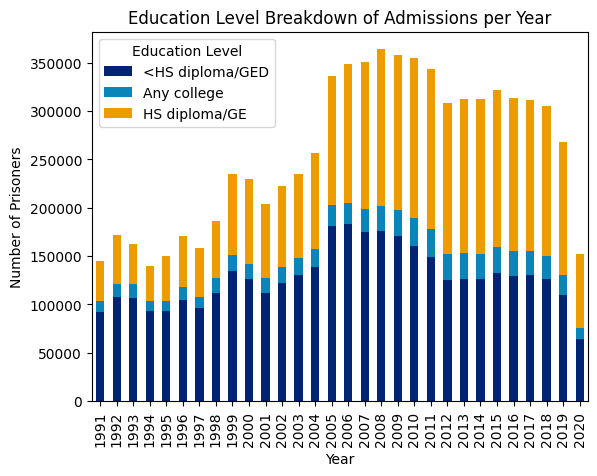

In [253]:
grouped = one_hot_df.groupby(['ADMITYR', 'EDUCATION']).size().unstack(fill_value=0)

mapping = {
        1: '<HS diploma/GED',
        2: 'HS diploma/GE', 
        3: 'Any college'
    }

one_hot_df['Education Level'] = one_hot_df['EDUCATION'].map(mapping)
one_hot_df['ADMITYR'] = one_hot_df['ADMITYR'].astype(int)

# Group the data by year and race
grouped = one_hot_df.groupby(['ADMITYR', 'Education Level']).size().unstack(fill_value=0)

# Plot a stacked bar graph
grouped.plot(kind='bar', stacked=True, color = color_map)

# Set the labels and title
# plt.figure(figsize=(8,8))
plt.xlabel('Year')
plt.ylabel('Number of Prisoners')
plt.title('Education Level Breakdown of Admissions per Year')
plt.savefig('Results/EduPerYear', bbox_inches='tight')
# Show the graph
plt.show()


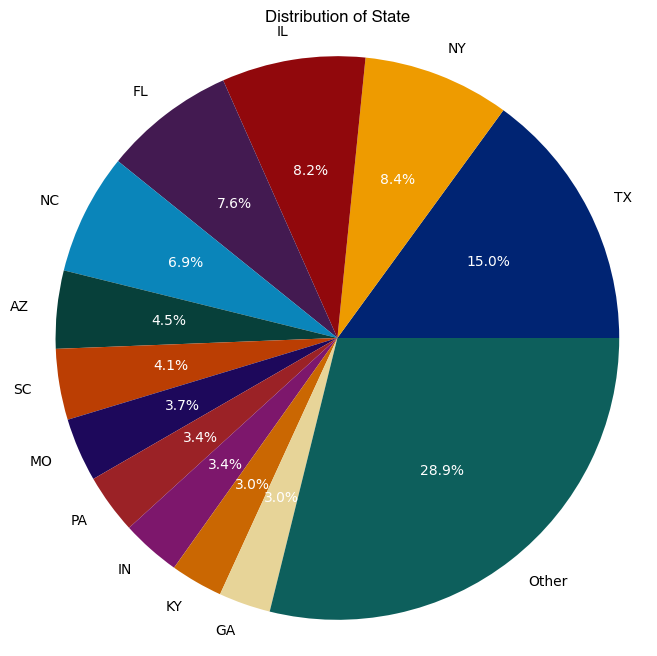

In [206]:
states_col = one_hot_df['STATE']

mapping = {
    1: 'AL',
    2: 'AK',
    4: 'AZ',
    5: 'AR',
    6: 'CA',
    8: 'CO',
    9: 'CT',
    10: 'DE',
    11: 'DC',
    12: 'FL',
    13: 'GA',
    15: 'HI',
    16: 'ID',
    17: 'IL',
    18: 'IN',
    19: 'IA',
    20: 'KS',
    21: 'KY',
    22: 'LA',
    23: 'ME',
    24: 'MD',
    25: 'MA',
    26: 'MI',
    27: 'MN',
    28: 'MS',
    29: 'MO',
    30: 'MT',
    31: 'NE',
    32: 'NV',
    33: 'NH',
    34: 'NJ',
    35: 'NM',
    36: 'NY',
    37: 'NC',
    38: 'ND',
    39: 'OH',
    40: 'OK',
    41: 'OR',
    42: 'PA',
    44: 'RI',
    45: 'SC',
    46: 'SD',
    47: 'TN',
    48: 'TX',
    49: 'UT',
    50: 'VT',
    51: 'VA',
    53: 'WA',
    54: 'WV',
    55: 'WI',
    56: 'WY'
}

stateStringCol = one_hot_df['STATE'].map(mapping)

state_counts = stateStringCol.value_counts(sort=True, ascending=False)
# creating a list of state labels in the same order as the sorted state counts
sortedMapping = state_counts.to_dict()
sortedMapping = dict(sorted(sortedMapping.items(), key=lambda x: -x[1]))
sortedLabels = list(sortedMapping.keys())

# combining all the states below the top twelve into one slice
n = 12
top_states = sortedLabels[:n]

# Get the sum of the values of the removed states
other_states_count = state_counts.loc[~state_counts.index.isin(top_states)].sum()

# Combine the removed states into a single slice
labels = list(top_states) + ['Other']
values = list(state_counts[top_states]) + [other_states_count]

# Create a pie chart using matplotlib
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(values, labels=labels, autopct='%1.1f%%', colors=pie_colors)

# make text white
for text in ax.texts:
    if '%' in text.get_text():
        text.set_color('white')

plt.title('Distribution of State', **font)
plt.axis('equal')
plt.savefig('Results/StateDistrib', bbox_inches='tight')
plt.show()

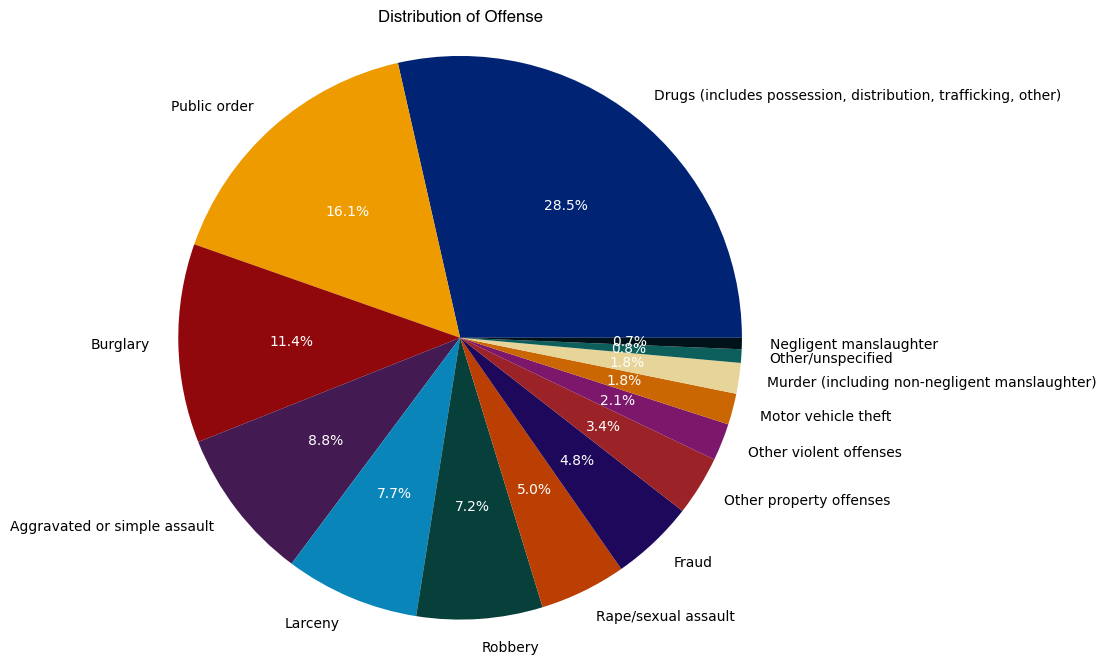

In [208]:
off_col = one_hot_df['OFFDETAIL']

mapping = {
    1: 'Murder (including non-negligent manslaughter)',
    2: 'Negligent manslaughter',
    3: 'Rape/sexual assault',
    4: 'Robbery',
    5: 'Aggravated or simple assault',
    6: 'Other violent offenses',
    7: 'Burglary',
    8: 'Larceny',
    9: 'Motor vehicle theft',
    10: 'Fraud',
    11: 'Other property offenses',
    12: 'Drugs (includes possession, distribution, trafficking, other)',
    13: 'Public order',
    14: 'Other/unspecified'
}

offStringCol = one_hot_df['OFFDETAIL'].map(mapping)
off_counts = offStringCol.value_counts(sort=True, ascending=False)

# creating a list of offense labels in the same order as the sorted state counts
sortedMapping = off_counts.to_dict()
sortedMapping = dict(sorted(sortedMapping.items(), key=lambda x: -x[1]))

sortedLabels = list(sortedMapping.keys())

# Create a pie chart using matplotlib
fix, ax = plt.subplots(figsize=(8,8))
ax.pie(off_counts, labels=sortedLabels, autopct='%1.1f%%', colors=pie_colors)
for text in ax.texts:
    if '%' in text.get_text():
        text.set_color('white')
        
plt.title('Distribution of Offense', **font)
plt.axis('equal')
plt.savefig('Results/OffenseDistrib', bbox_inches='tight')
plt.show()

<Figure size 1200x1200 with 0 Axes>

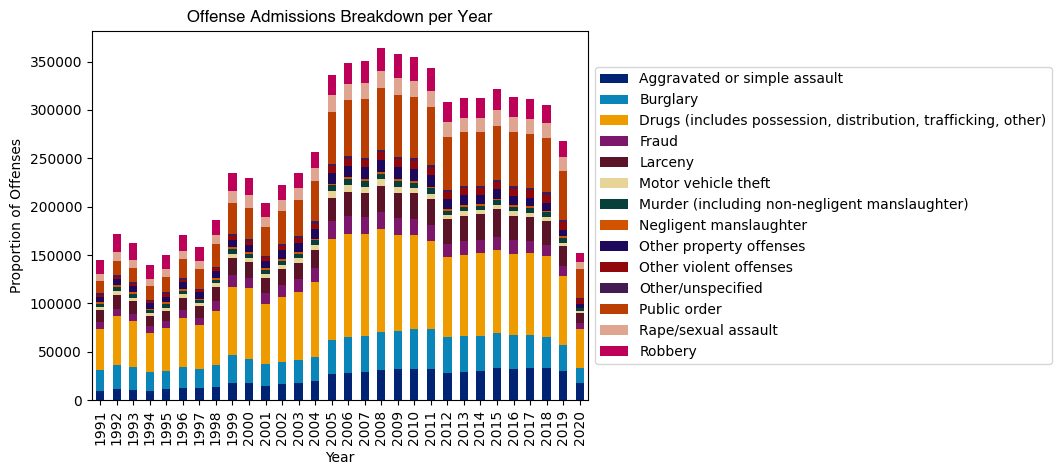

In [257]:
grouped = one_hot_df.groupby(['ADMITYR', 'OFFDETAIL']).size().unstack(fill_value=0)

mapping = {
    1: 'Murder (including non-negligent manslaughter)',
    2: 'Negligent manslaughter',
    3: 'Rape/sexual assault',
    4: 'Robbery',
    5: 'Aggravated or simple assault',
    6: 'Other violent offenses',
    7: 'Burglary',
    8: 'Larceny',
    9: 'Motor vehicle theft',
    10: 'Fraud',
    11: 'Other property offenses',
    12: 'Drugs (includes possession, distribution, trafficking, other)',
    13: 'Public order',
    14: 'Other/unspecified'
}

# colors = ['#2c2a4a', '#4f518c', '#907ad6', '#dabfff']

one_hot_df['offense'] = one_hot_df['OFFDETAIL'].map(mapping)


# Group the data by year and race
grouped = one_hot_df.groupby(['ADMITYR', 'offense']).size().unstack(fill_value=0)

# # Compute the proportion of each race per year
# proportions = grouped.div(grouped.sum(axis=1), axis=0)

plt.figure(figsize=(12,12))
# Plot a stacked bar graph of the proportions
grouped.plot(kind='bar', stacked=True, color=color_map)

# Set the labels and title

plt.xlabel('Year')
plt.ylabel('Proportion of Offenses')
plt.title('Offense Admissions Breakdown per Year', **font)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Results/OffensePerYear', bbox_inches='tight')

# Show the graph
plt.show()

/var/folders/v1/ljzyxbgj1xx_syzq56dgnsk00000gn/T/ipykernel_6087/2104259679.py:34: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 1)


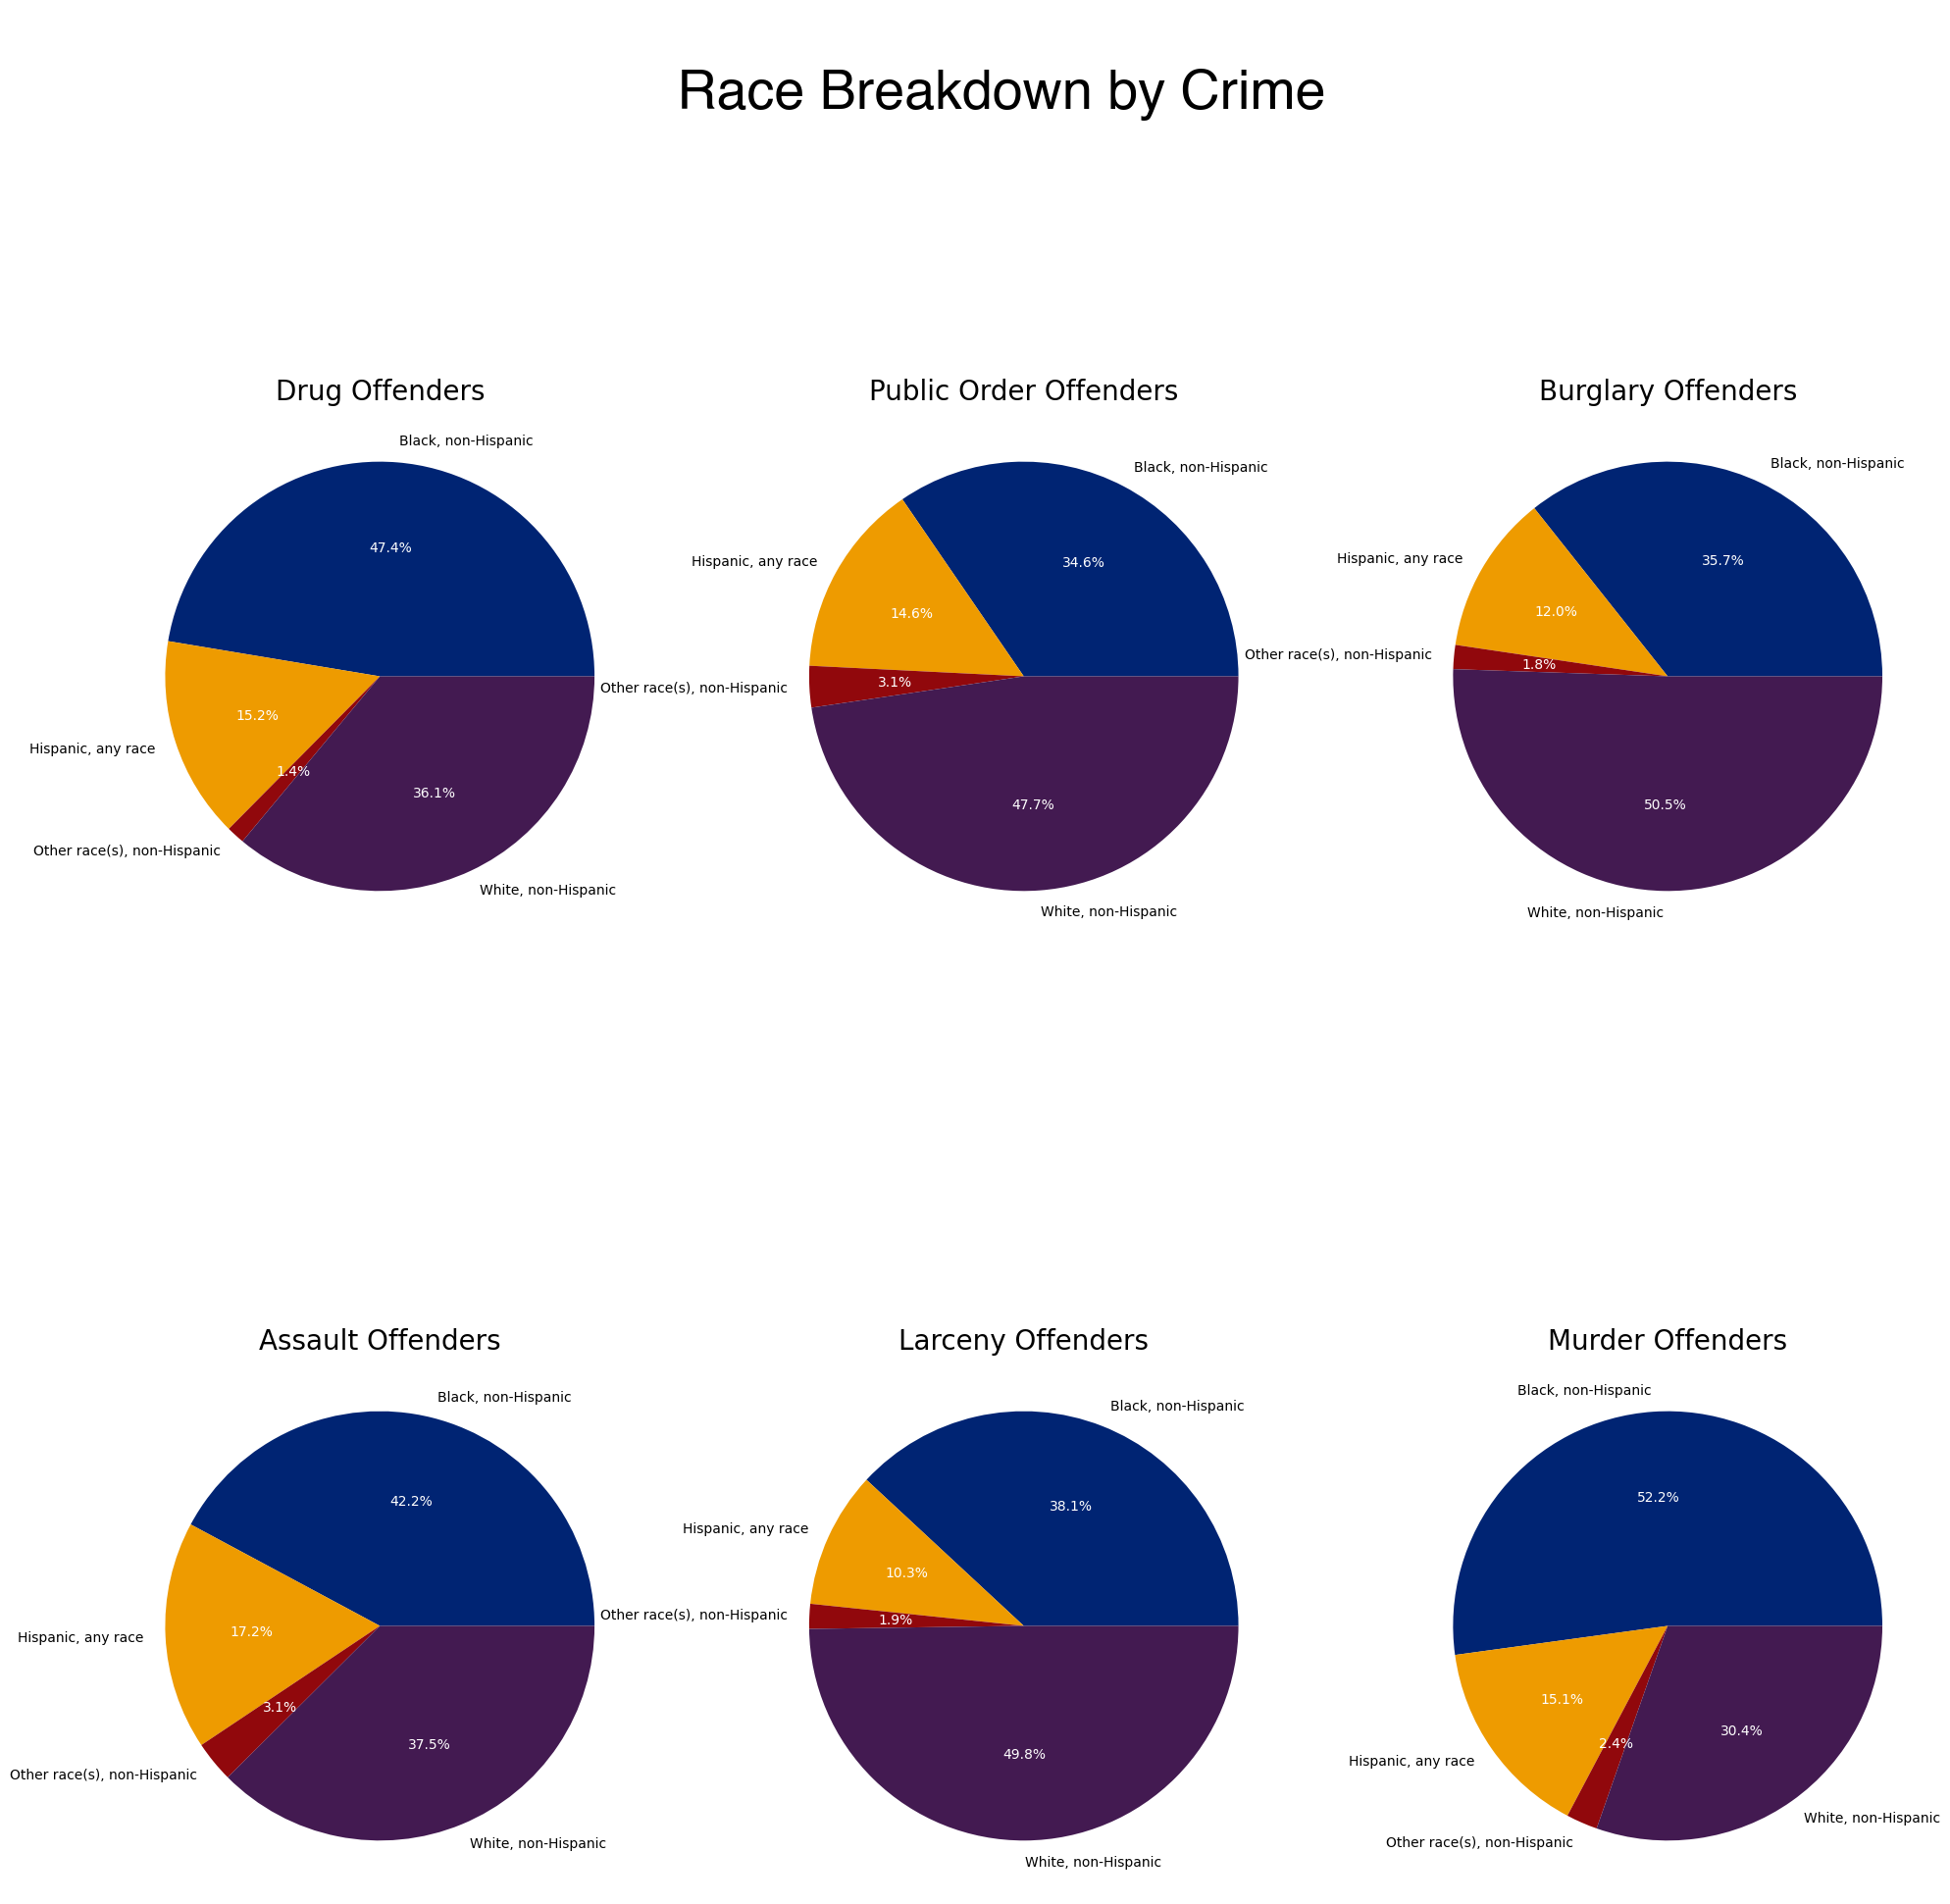

In [215]:
# Mapping dictionaries
offenseMapping = {
    1: 'Murder (including non-negligent manslaughter)',
    2: 'Negligent manslaughter',
    3: 'Rape/sexual assault',
    4: 'Robbery',
    5: 'Aggravated or simple assault',
    6: 'Other violent offenses',
    7: 'Burglary',
    8: 'Larceny',
    9: 'Motor vehicle theft',
    10: 'Fraud',
    11: 'Other property offenses',
    12: 'Drugs (includes possession, distribution, trafficking, other)',
    13: 'Public order',
    14: 'Other/unspecified'
}

raceMapping = {1: 'White, non-Hispanic',
               2: 'Black, non-Hispanic',
               3: 'Hispanic, any race',
               4: 'Other race(s), non-Hispanic'}

# Map the offense and race values to their corresponding labels
one_hot_df['Offense'] = one_hot_df['OFFDETAIL'].map(offenseMapping)
one_hot_df['Race'] = one_hot_df['RACE'].map(raceMapping)



fig, ax = plt.subplots(figsize=(24,24))
plt.subplots_adjust(hspace=0.1)


plt.subplot(2, 3, 1)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Drugs (includes possession, distribution, trafficking, other)']
raceCounts = offenseData.groupby('Race').size()
_, _, text = plt.pie(raceCounts.values, labels=raceCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Drug Offenders', fontsize=20)


plt.subplot(2, 3, 2)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Public order']
raceCounts = offenseData.groupby('Race').size()
_, _, text = plt.pie(raceCounts.values, labels=raceCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Public Order Offenders', fontsize=20)


plt.subplot(2, 3, 3)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Burglary']
raceCounts = offenseData.groupby('Race').size()
_, _, text = plt.pie(raceCounts.values, labels=raceCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Burglary Offenders', fontsize=20)


plt.subplot(2, 3, 4)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Aggravated or simple assault']
raceCounts = offenseData.groupby('Race').size()
_, _, text = plt.pie(raceCounts.values, labels=raceCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Assault Offenders', fontsize=20)


plt.subplot(2, 3, 5)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Larceny']
raceCounts = offenseData.groupby('Race').size()
_, _, text = plt.pie(raceCounts.values, labels=raceCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Larceny Offenders', fontsize=20)

plt.subplot(2, 3, 6)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Murder (including non-negligent manslaughter)']
raceCounts = offenseData.groupby('Race').size()
_, _, text = plt.pie(raceCounts.values, labels=raceCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Murder Offenders', fontsize=20)


plt.suptitle('\n Race Breakdown by Crime', **font, fontsize=40)
plt.savefig('Results/Race-Crime Breakdown.png', bbox_inches='tight')

plt.show()

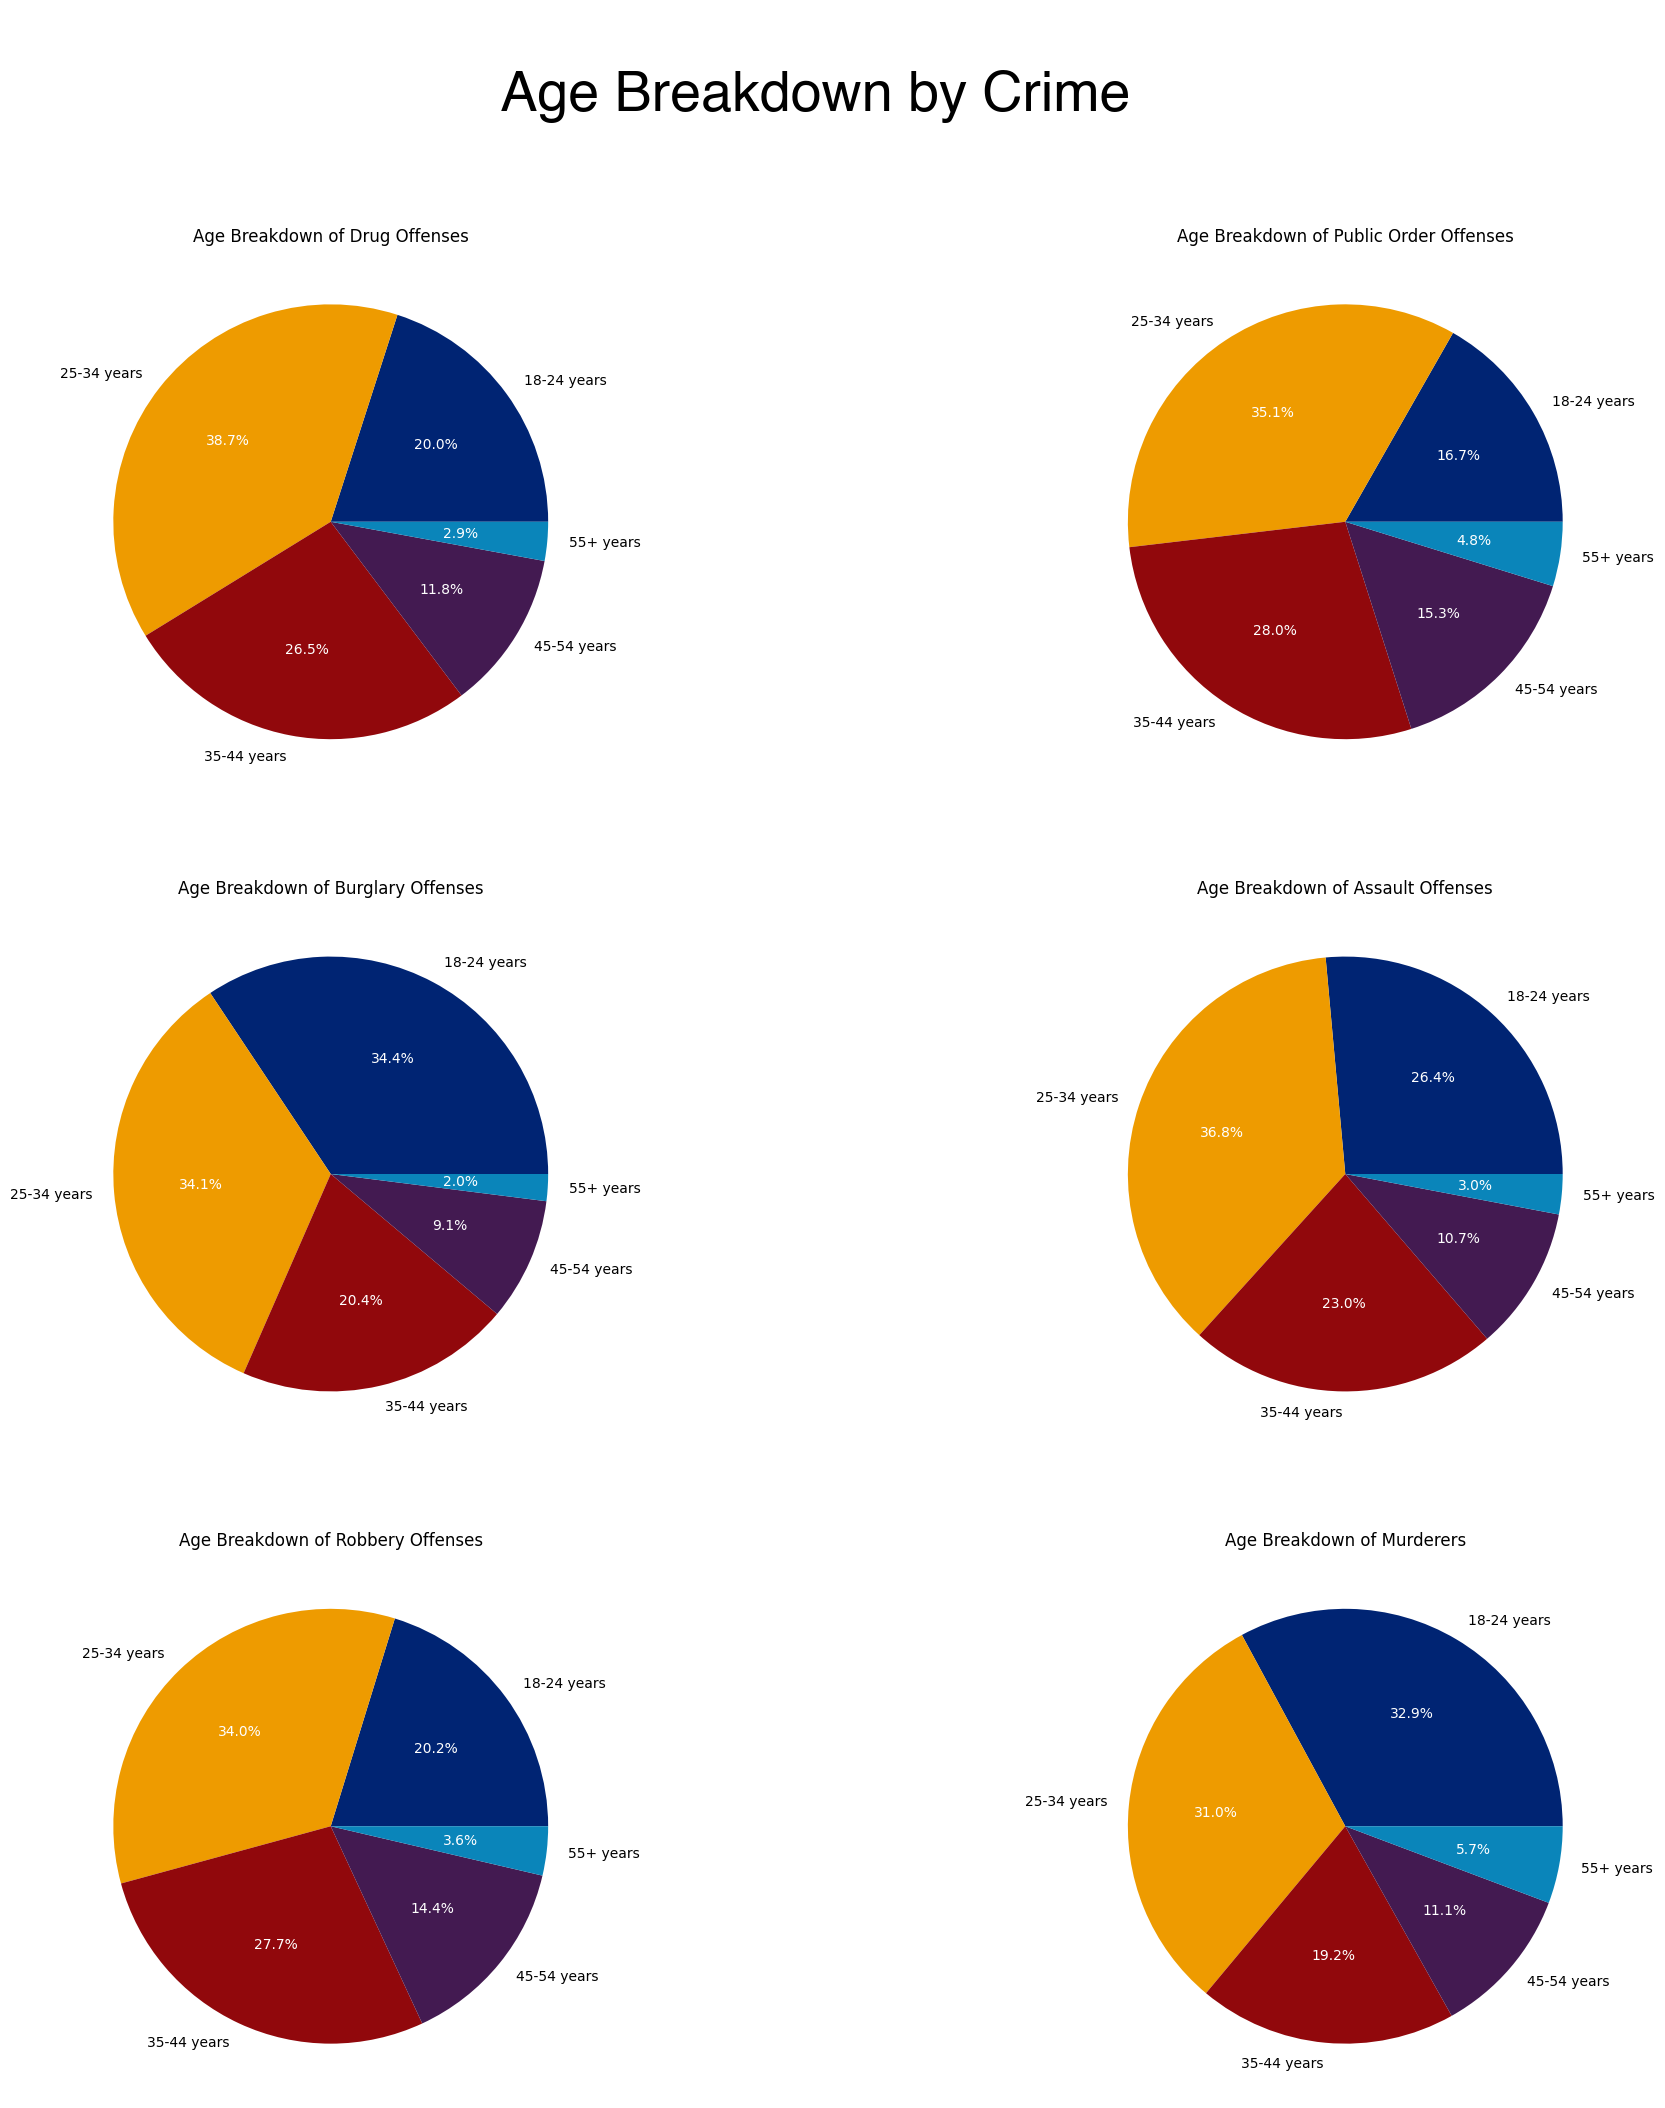

In [216]:
# Mapping dictionaries
offenseMapping = {
    1: 'Murder (including non-negligent manslaughter)',
    2: 'Negligent manslaughter',
    3: 'Rape/sexual assault',
    4: 'Robbery',
    5: 'Aggravated or simple assault',
    6: 'Other violent offenses',
    7: 'Burglary',
    8: 'Larceny',
    9: 'Motor vehicle theft',
    10: 'Fraud',
    11: 'Other property offenses',
    12: 'Drugs (includes possession, distribution, trafficking, other)',
    13: 'Public order',
    14: 'Other/unspecified'
}

ageMapping = {
        1: '18-24 years',
        2: '25-34 years',
        3: '35-44 years',
        4: '45-54 years',
        5: '55+ years'
    }

# Map the offense and race values to their corresponding labels
one_hot_df['Offense'] = one_hot_df['OFFDETAIL'].map(offenseMapping)
one_hot_df['Age'] = one_hot_df['AGEADMIT'].map(ageMapping)


plt.figure(figsize=(24,24))


plt.subplot(3, 2, 1)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Drugs (includes possession, distribution, trafficking, other)']
ageCounts = offenseData.groupby('Age').size()
_, _, text = plt.pie(ageCounts.values, labels=ageCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Age Breakdown of Drug Offenses')


plt.subplot(3, 2, 2)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Public order']
ageCounts = offenseData.groupby('Age').size()
_, _, text = plt.pie(ageCounts.values, labels=ageCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Age Breakdown of Public Order Offenses')


plt.subplot(3, 2, 3)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Burglary']
ageCounts = offenseData.groupby('Age').size()
_, _, text = plt.pie(ageCounts.values, labels=ageCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Age Breakdown of Burglary Offenses')


plt.subplot(3, 2, 4)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Aggravated or simple assault']
ageCounts = offenseData.groupby('Age').size()
_, _, text = plt.pie(ageCounts.values, labels=ageCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Age Breakdown of Assault Offenses')


plt.subplot(3, 2, 5)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Larceny']
ageCounts = offenseData.groupby('Age').size()
_, _, text = plt.pie(ageCounts.values, labels=ageCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Age Breakdown of Robbery Offenses')

plt.subplot(3, 2, 6)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Murder (including non-negligent manslaughter)']
ageCounts = offenseData.groupby('Age').size()
_, _, text = plt.pie(ageCounts.values, labels=ageCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Age Breakdown of Murderers')


plt.suptitle('\n Age Breakdown by Crime', **font, fontsize=40)
plt.savefig('Results/Age-Crime Breakdown.png', bbox_inches='tight')

plt.show()

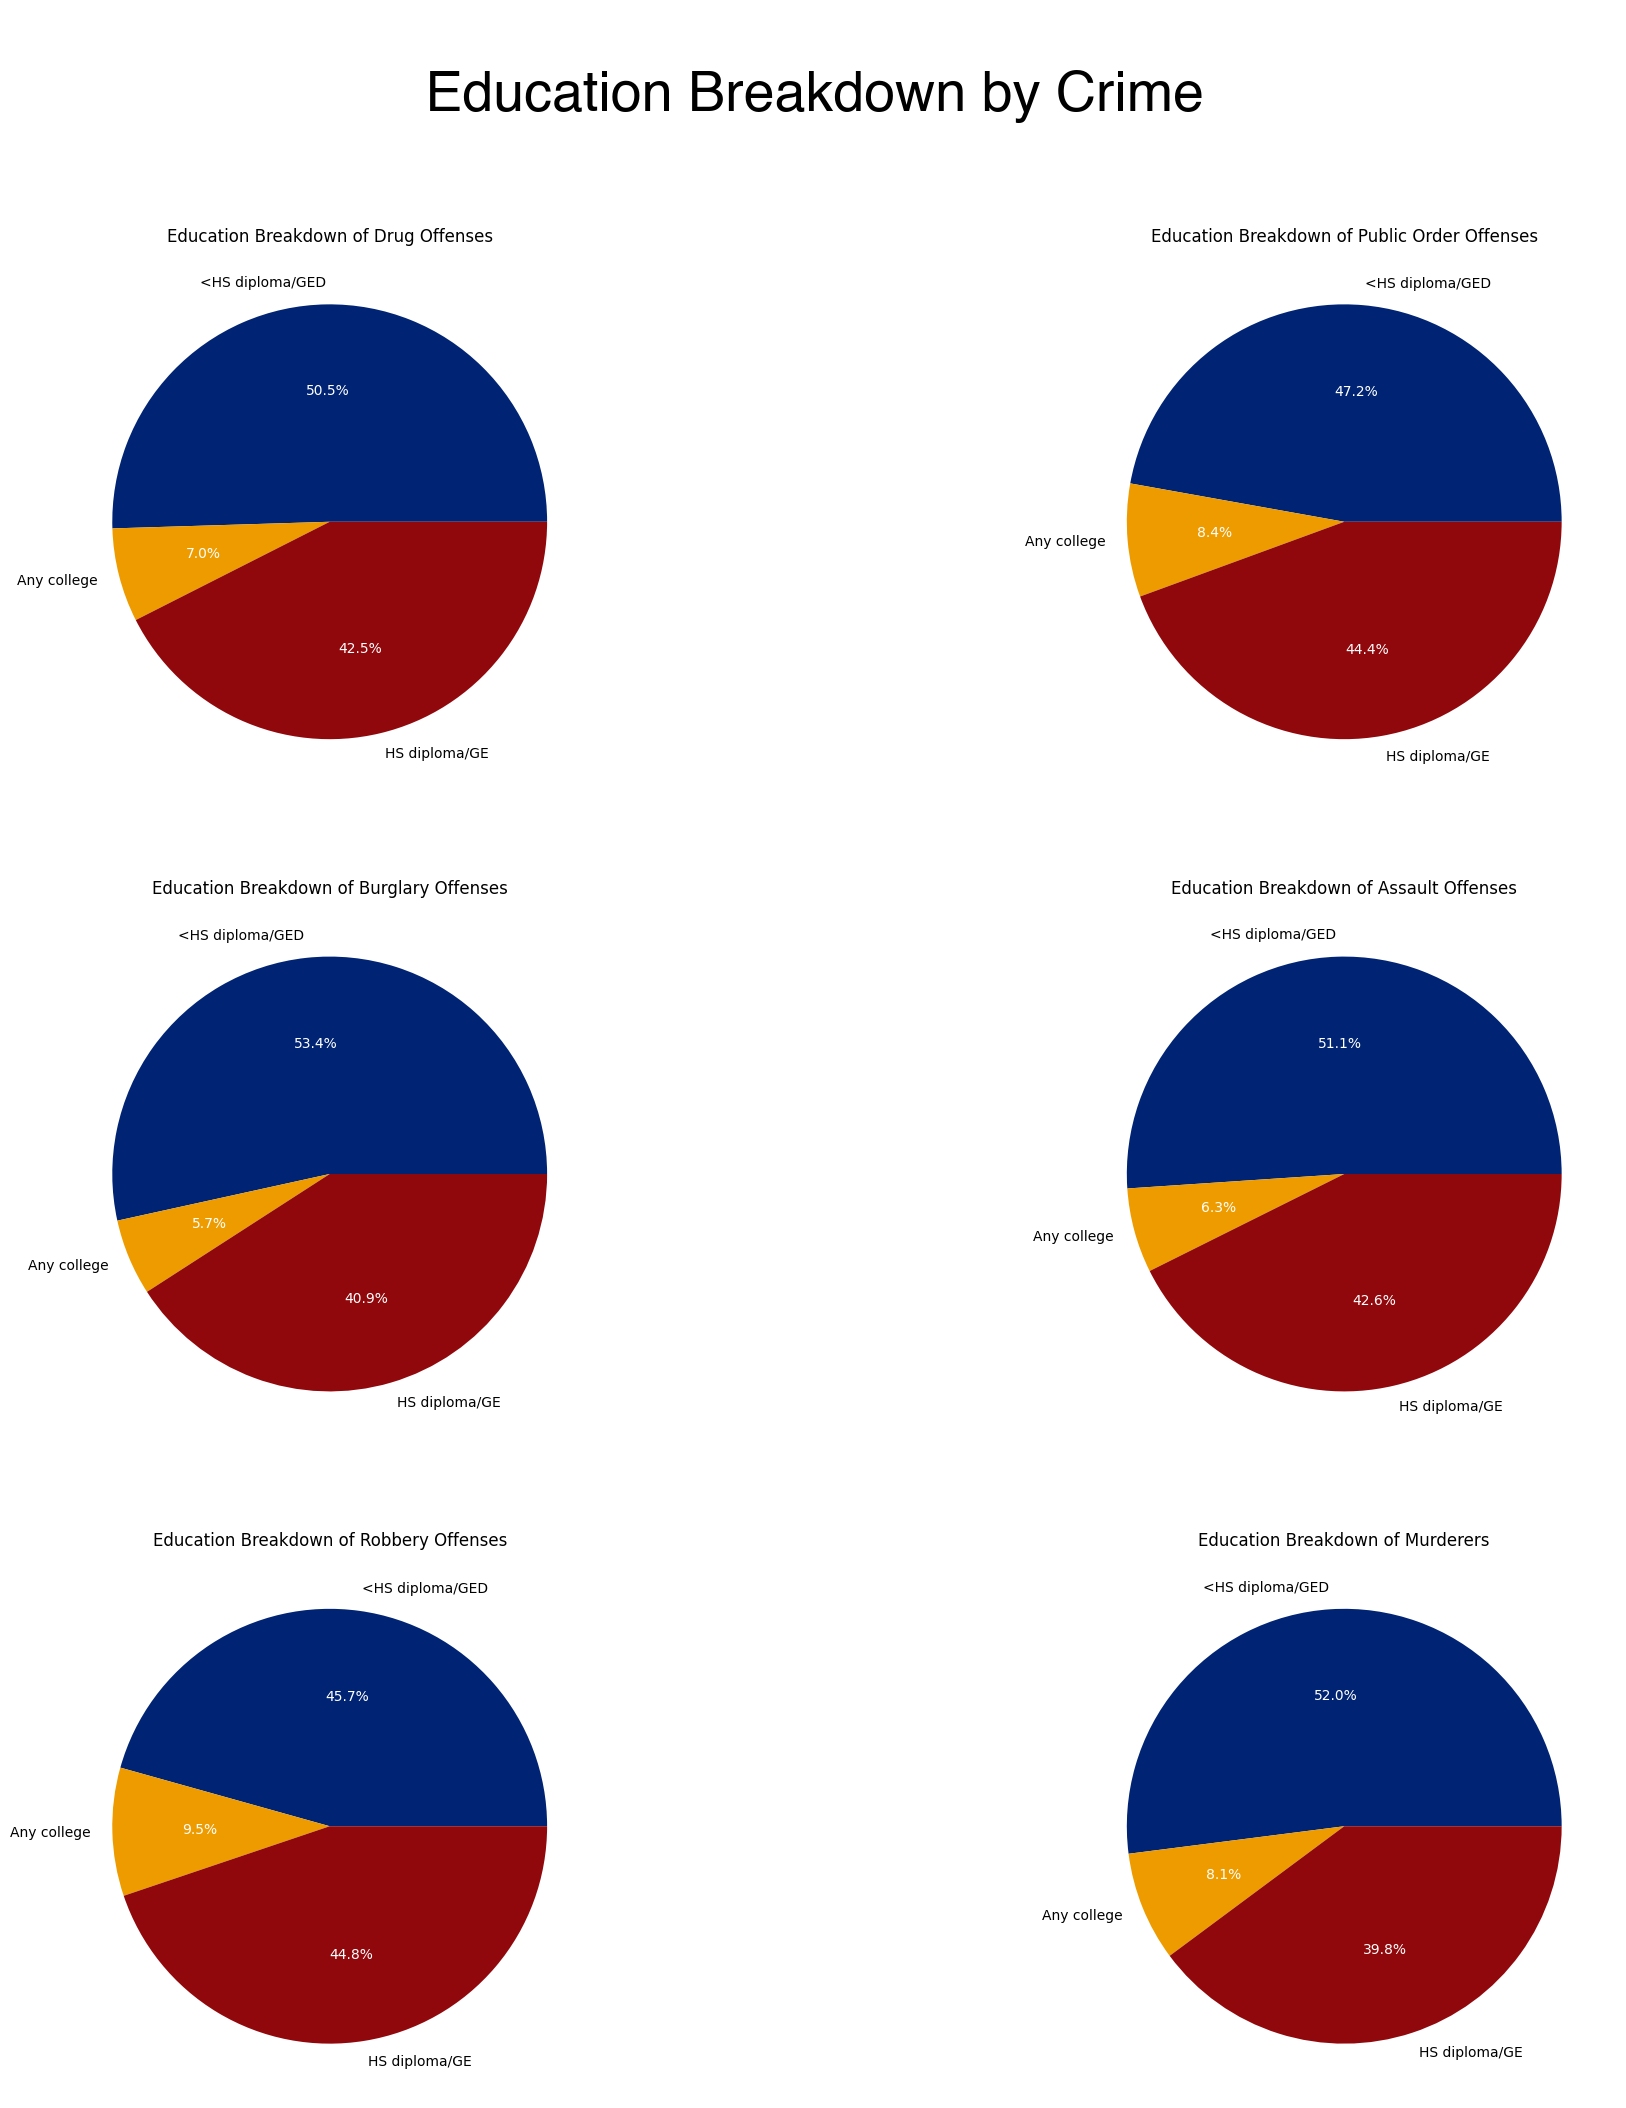

In [217]:
# Mapping dictionaries
offenseMapping = {
    1: 'Murder (including non-negligent manslaughter)',
    2: 'Negligent manslaughter',
    3: 'Rape/sexual assault',
    4: 'Robbery',
    5: 'Aggravated or simple assault',
    6: 'Other violent offenses',
    7: 'Burglary',
    8: 'Larceny',
    9: 'Motor vehicle theft',
    10: 'Fraud',
    11: 'Other property offenses',
    12: 'Drugs (includes possession, distribution, trafficking, other)',
    13: 'Public order',
    14: 'Other/unspecified'
}

eduMapping = {
        1: '<HS diploma/GED',
        2: 'HS diploma/GE', 
        3: 'Any college'
    }

# Map the offense and race values to their corresponding labels
one_hot_df['Offense'] = one_hot_df['OFFDETAIL'].map(offenseMapping)
one_hot_df['Education'] = one_hot_df['EDUCATION'].map(eduMapping)


plt.figure(figsize=(24,24))


plt.subplot(3, 2, 1)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Drugs (includes possession, distribution, trafficking, other)']
eduCounts = offenseData.groupby('Education').size()
_, _, text = plt.pie(eduCounts.values, labels=eduCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Education Breakdown of Drug Offenses')


plt.subplot(3, 2, 2)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Public order']
eduCounts = offenseData.groupby('Education').size()
_, _, text = plt.pie(eduCounts.values, labels=eduCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Education Breakdown of Public Order Offenses')


plt.subplot(3, 2, 3)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Burglary']
eduCounts = offenseData.groupby('Education').size()
_, _, text = plt.pie(eduCounts.values, labels=eduCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Education Breakdown of Burglary Offenses')


plt.subplot(3, 2, 4)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Aggravated or simple assault']
eduCounts = offenseData.groupby('Education').size()
_, _, text = plt.pie(eduCounts.values, labels=eduCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Education Breakdown of Assault Offenses')


plt.subplot(3, 2, 5)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Larceny']
eduCounts = offenseData.groupby('Education').size()
_, _, text = plt.pie(eduCounts.values, labels=eduCounts.index, autopct='%1.1f%%',  colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Education Breakdown of Robbery Offenses')

plt.subplot(3, 2, 6)
offenseData = one_hot_df[one_hot_df['Offense'] == 'Murder (including non-negligent manslaughter)']
eduCounts = offenseData.groupby('Education').size()
_, _, text = plt.pie(eduCounts.values, labels=eduCounts.index, autopct='%1.1f%%',  colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Education Breakdown of Murderers')


plt.suptitle('\n Education Breakdown by Crime', **font, fontsize=40)
plt.savefig('Results/Edu-Crime Breakdown.png', bbox_inches='tight')

plt.show()

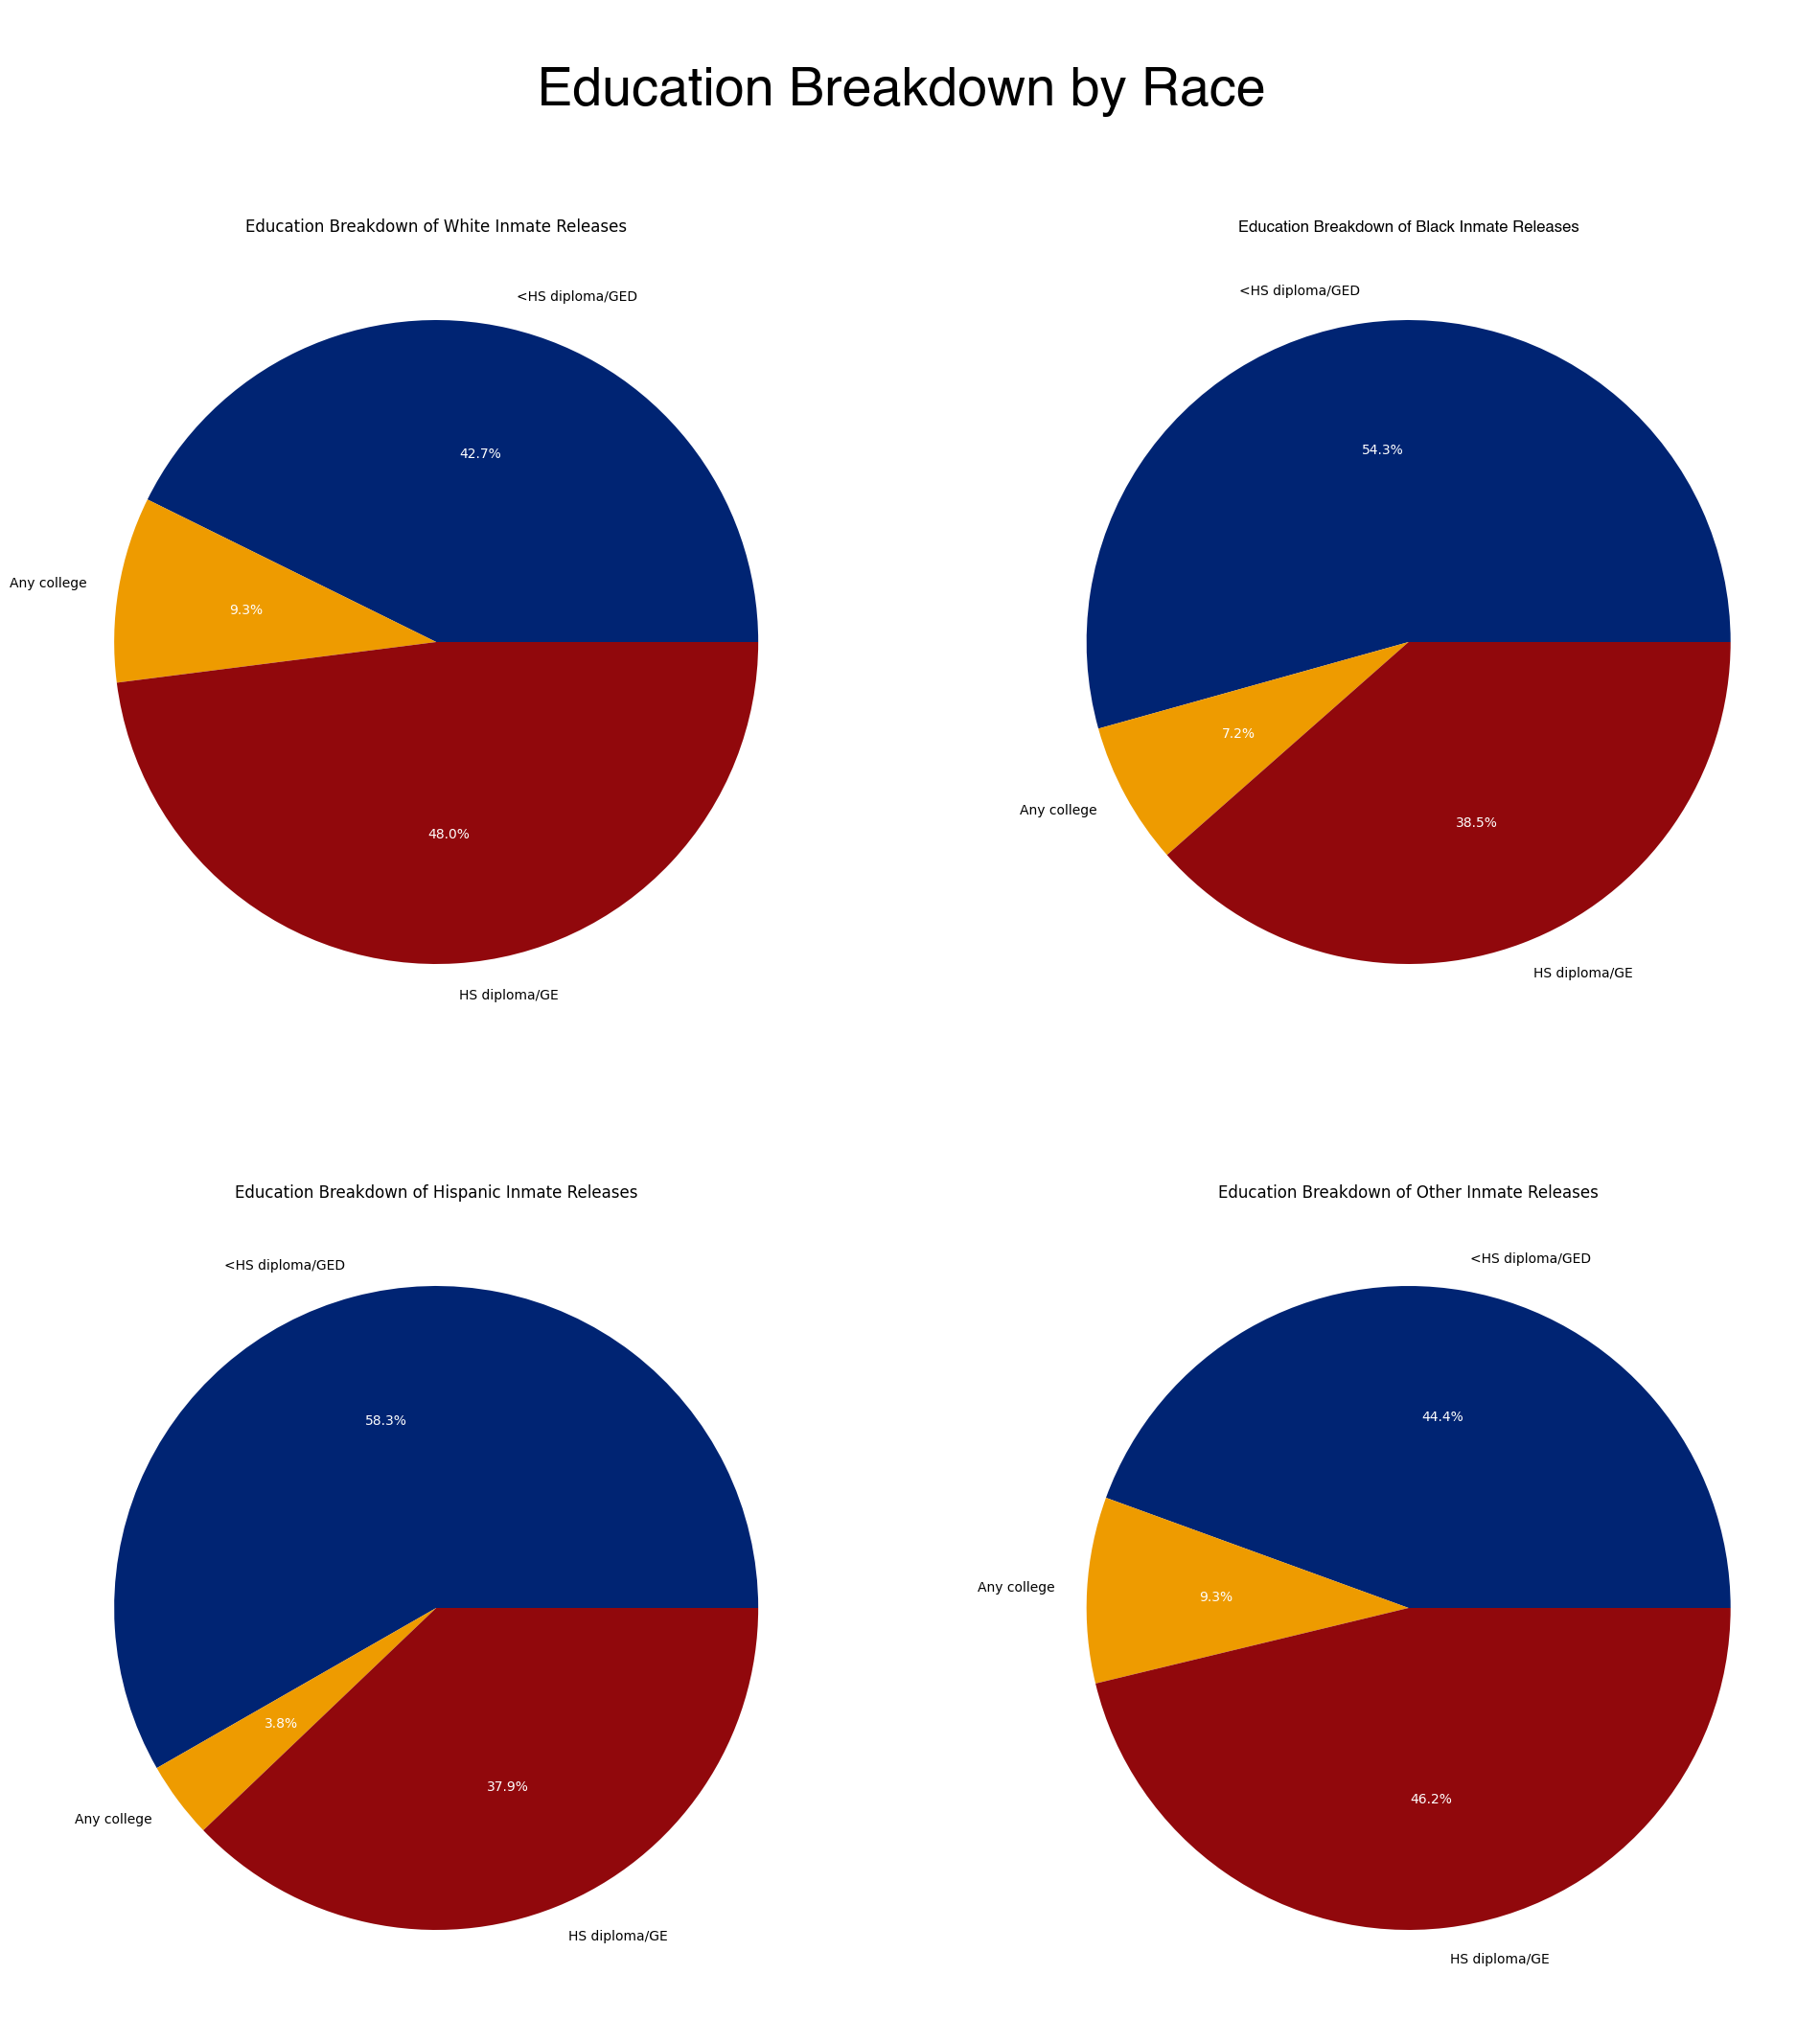

In [220]:
# Mapping dictionaries
raceMapping = {1: 'White, non-Hispanic',
               2: 'Black, non-Hispanic',
               3: 'Hispanic, any race',
               4: 'Other race(s), non-Hispanic'}

eduMapping = {
        1: '<HS diploma/GED',
        2: 'HS diploma/GE', 
        3: 'Any college'
    }

# Map the offense and race values to their corresponding labels
one_hot_df['Race'] = one_hot_df['RACE'].map(raceMapping)
one_hot_df['Education'] = one_hot_df['EDUCATION'].map(eduMapping)


plt.figure(figsize=(24,24))


plt.subplot(2, 2, 1)
raceData = one_hot_df[one_hot_df['Race'] == 'White, non-Hispanic']
eduCounts = raceData.groupby('Education').size()
_, _, text = plt.pie(eduCounts.values, labels=eduCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Education Breakdown of White Inmate Releases')


plt.subplot(2, 2, 2)
raceData = one_hot_df[one_hot_df['Race'] == 'Black, non-Hispanic']
eduCounts = raceData.groupby('Education').size()
_, _, text = plt.pie(eduCounts.values, labels=eduCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Education Breakdown of Black Inmate Releases', font)


plt.subplot(2, 2, 3)
raceData = one_hot_df[one_hot_df['Race'] == 'Hispanic, any race']
eduCounts = raceData.groupby('Education').size()
_, _, text = plt.pie(eduCounts.values, labels=eduCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Education Breakdown of Hispanic Inmate Releases')


plt.subplot(2, 2, 4)
raceData = one_hot_df[one_hot_df['Race'] == 'Other race(s), non-Hispanic']
eduCounts = raceData.groupby('Education').size()
_, _, text = plt.pie(eduCounts.values, labels=eduCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Education Breakdown of Other Inmate Releases')


plt.suptitle('\n Education Breakdown by Race', **font, fontsize=40)
plt.savefig('Results/Edu-Race Breakdown.png', bbox_inches='tight')

plt.show()

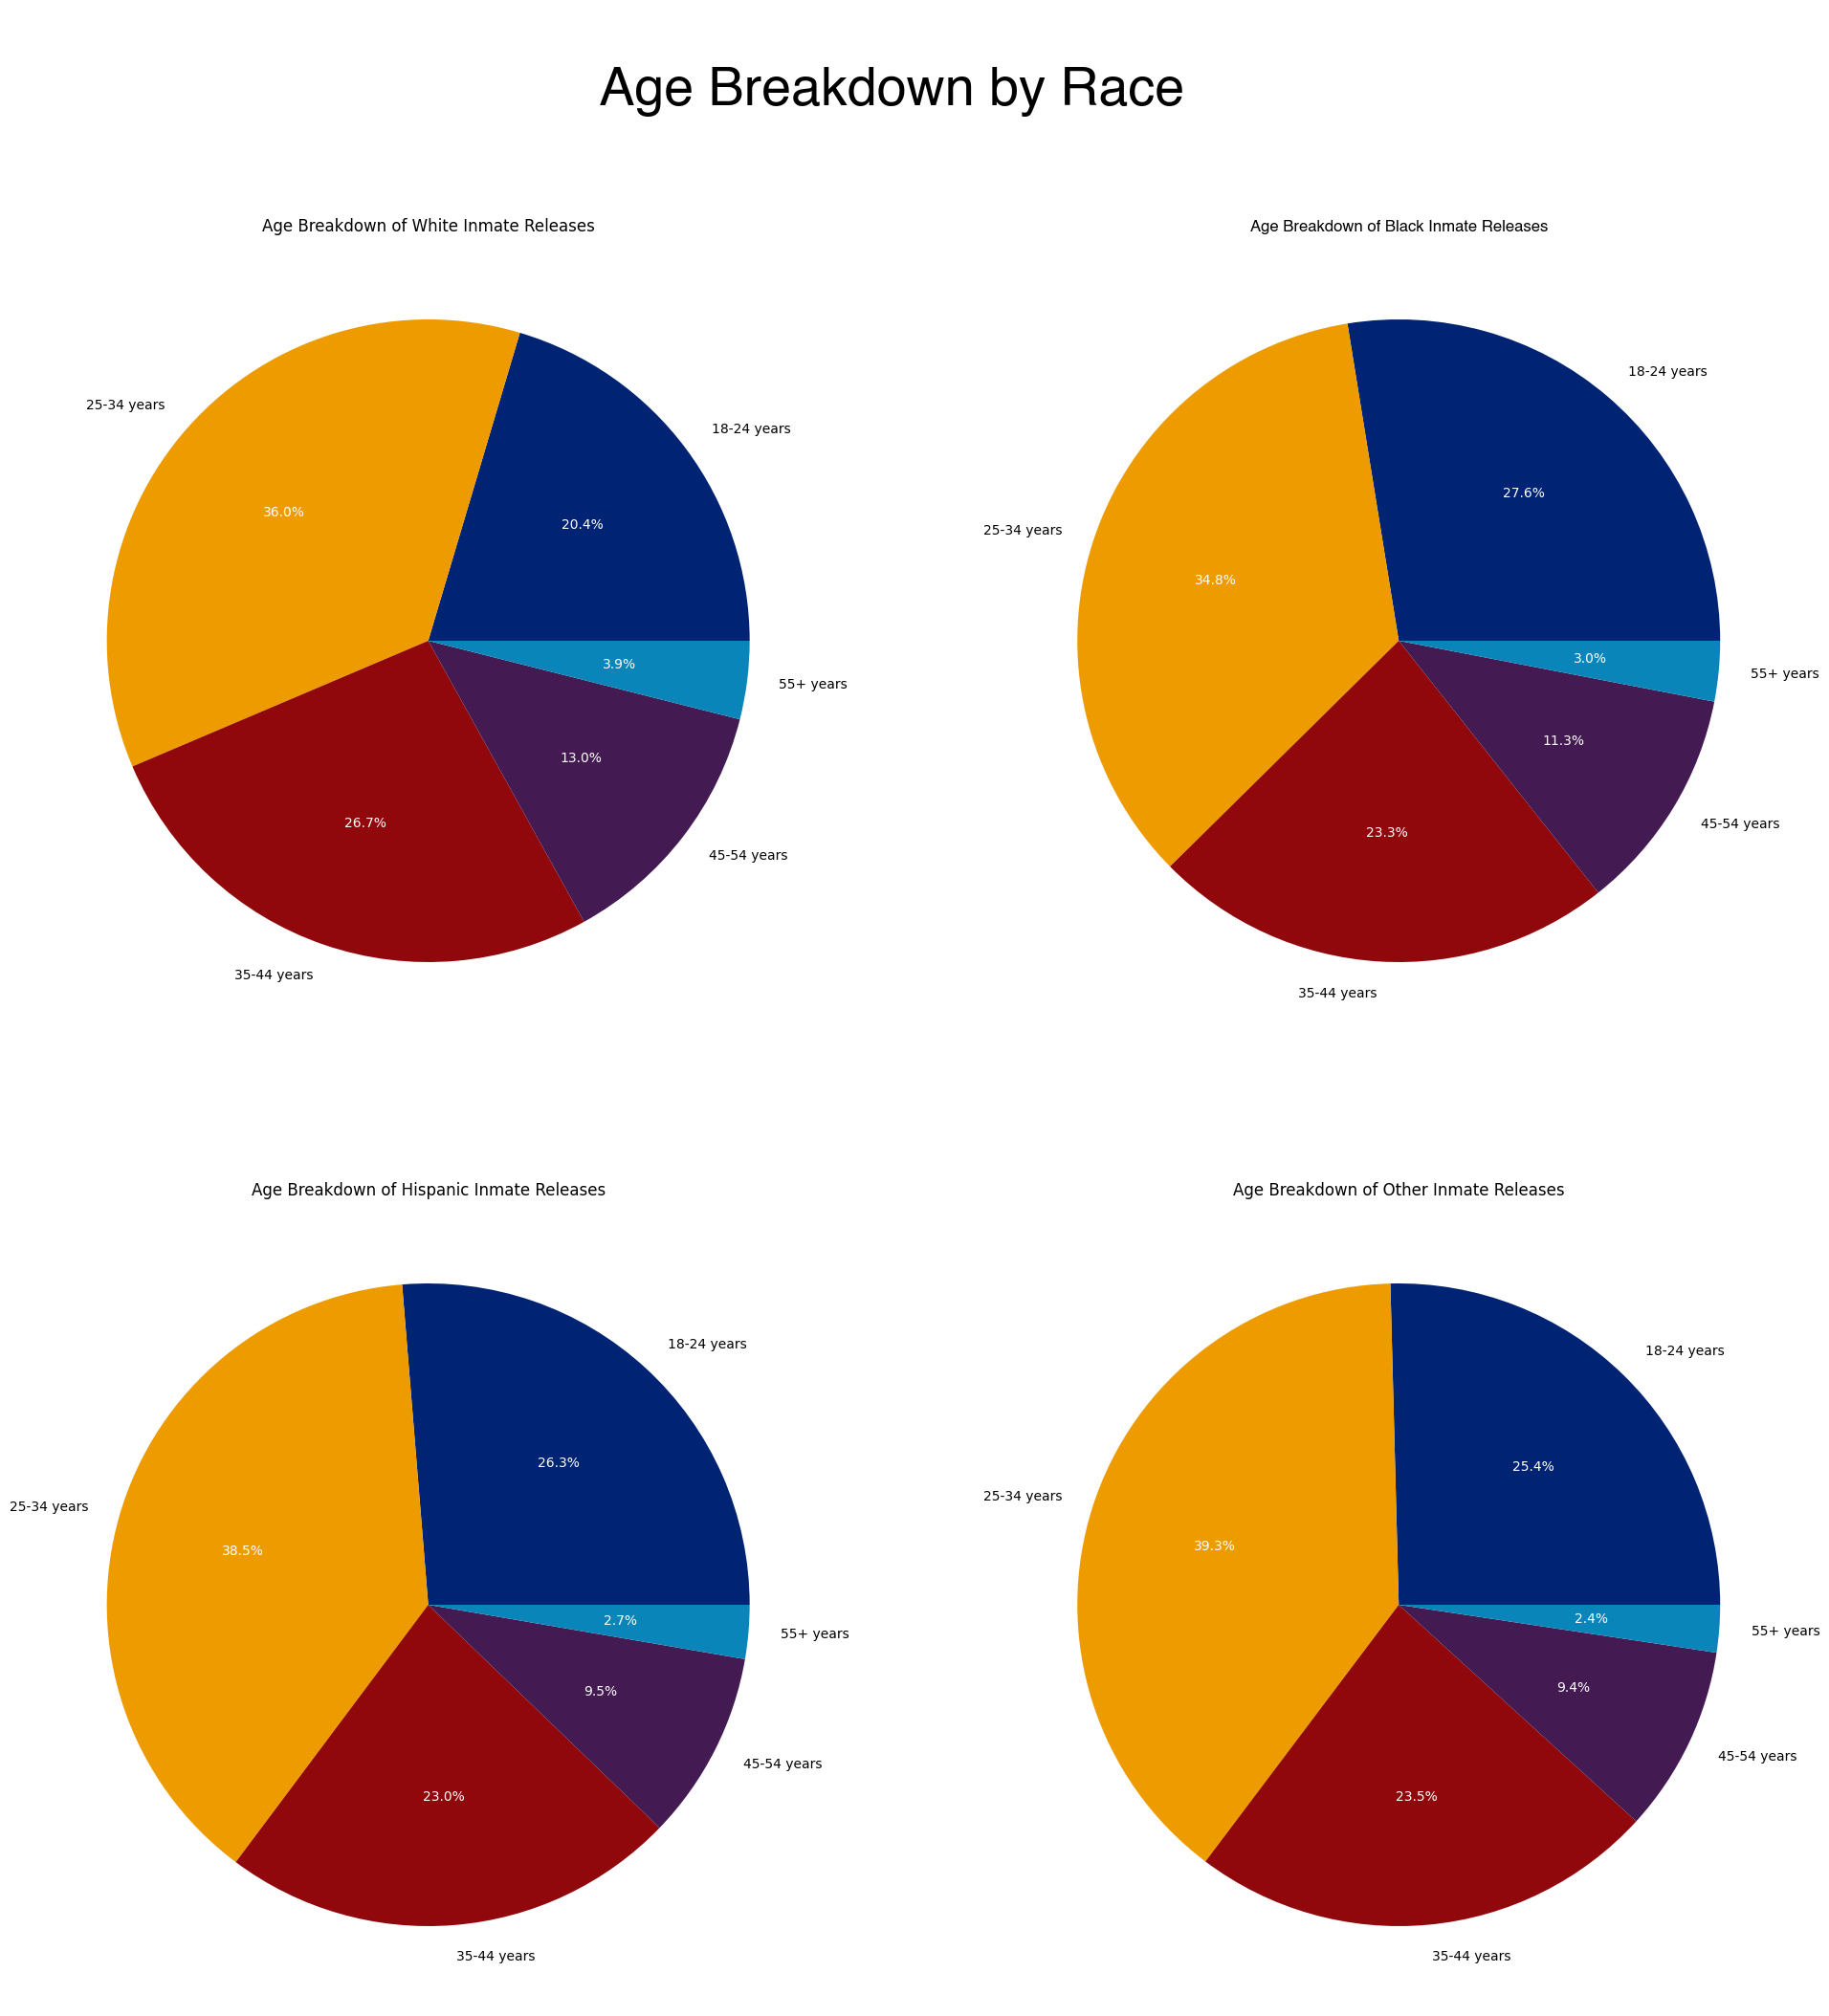

In [222]:
# Mapping dictionaries
raceMapping = {1: 'White, non-Hispanic',
               2: 'Black, non-Hispanic',
               3: 'Hispanic, any race',
               4: 'Other race(s), non-Hispanic'}

ageMapping = {
        1: '18-24 years',
        2: '25-34 years',
        3: '35-44 years',
        4: '45-54 years',
        5: '55+ years'
    }

# Map the age and race values to their corresponding labels
one_hot_df['Race'] = one_hot_df['RACE'].map(raceMapping)
one_hot_df['Age'] = one_hot_df['AGEADMIT'].map(ageMapping)

plt.figure(figsize=(24, 24))

plt.subplot(2, 2, 1)
raceData = one_hot_df[one_hot_df['Race'] == 'White, non-Hispanic']
ageCounts = raceData.groupby('Age').size()
_, _, text = plt.pie(ageCounts.values, labels=ageCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Age Breakdown of White Inmate Releases')

plt.subplot(2, 2, 2)
raceData = one_hot_df[one_hot_df['Race'] == 'Black, non-Hispanic']
ageCounts = raceData.groupby('Age').size()
_, _, text = plt.pie(ageCounts.values, labels=ageCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Age Breakdown of Black Inmate Releases', font)

plt.subplot(2, 2, 3)
raceData = one_hot_df[one_hot_df['Race'] == 'Hispanic, any race']
ageCounts = raceData.groupby('Age').size()
_, _, text = plt.pie(ageCounts.values, labels=ageCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Age Breakdown of Hispanic Inmate Releases')

plt.subplot(2, 2, 4)
raceData = one_hot_df[one_hot_df['Race'] == 'Other race(s), non-Hispanic']
ageCounts = raceData.groupby('Age').size()
_, _, text = plt.pie(ageCounts.values, labels=ageCounts.index, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')
plt.title('Age Breakdown of Other Inmate Releases')

plt.suptitle('\n Age Breakdown by Race', **font, fontsize=40)
plt.savefig('Results/Age-Race Breakdown.png', bbox_inches='tight')
plt.show()


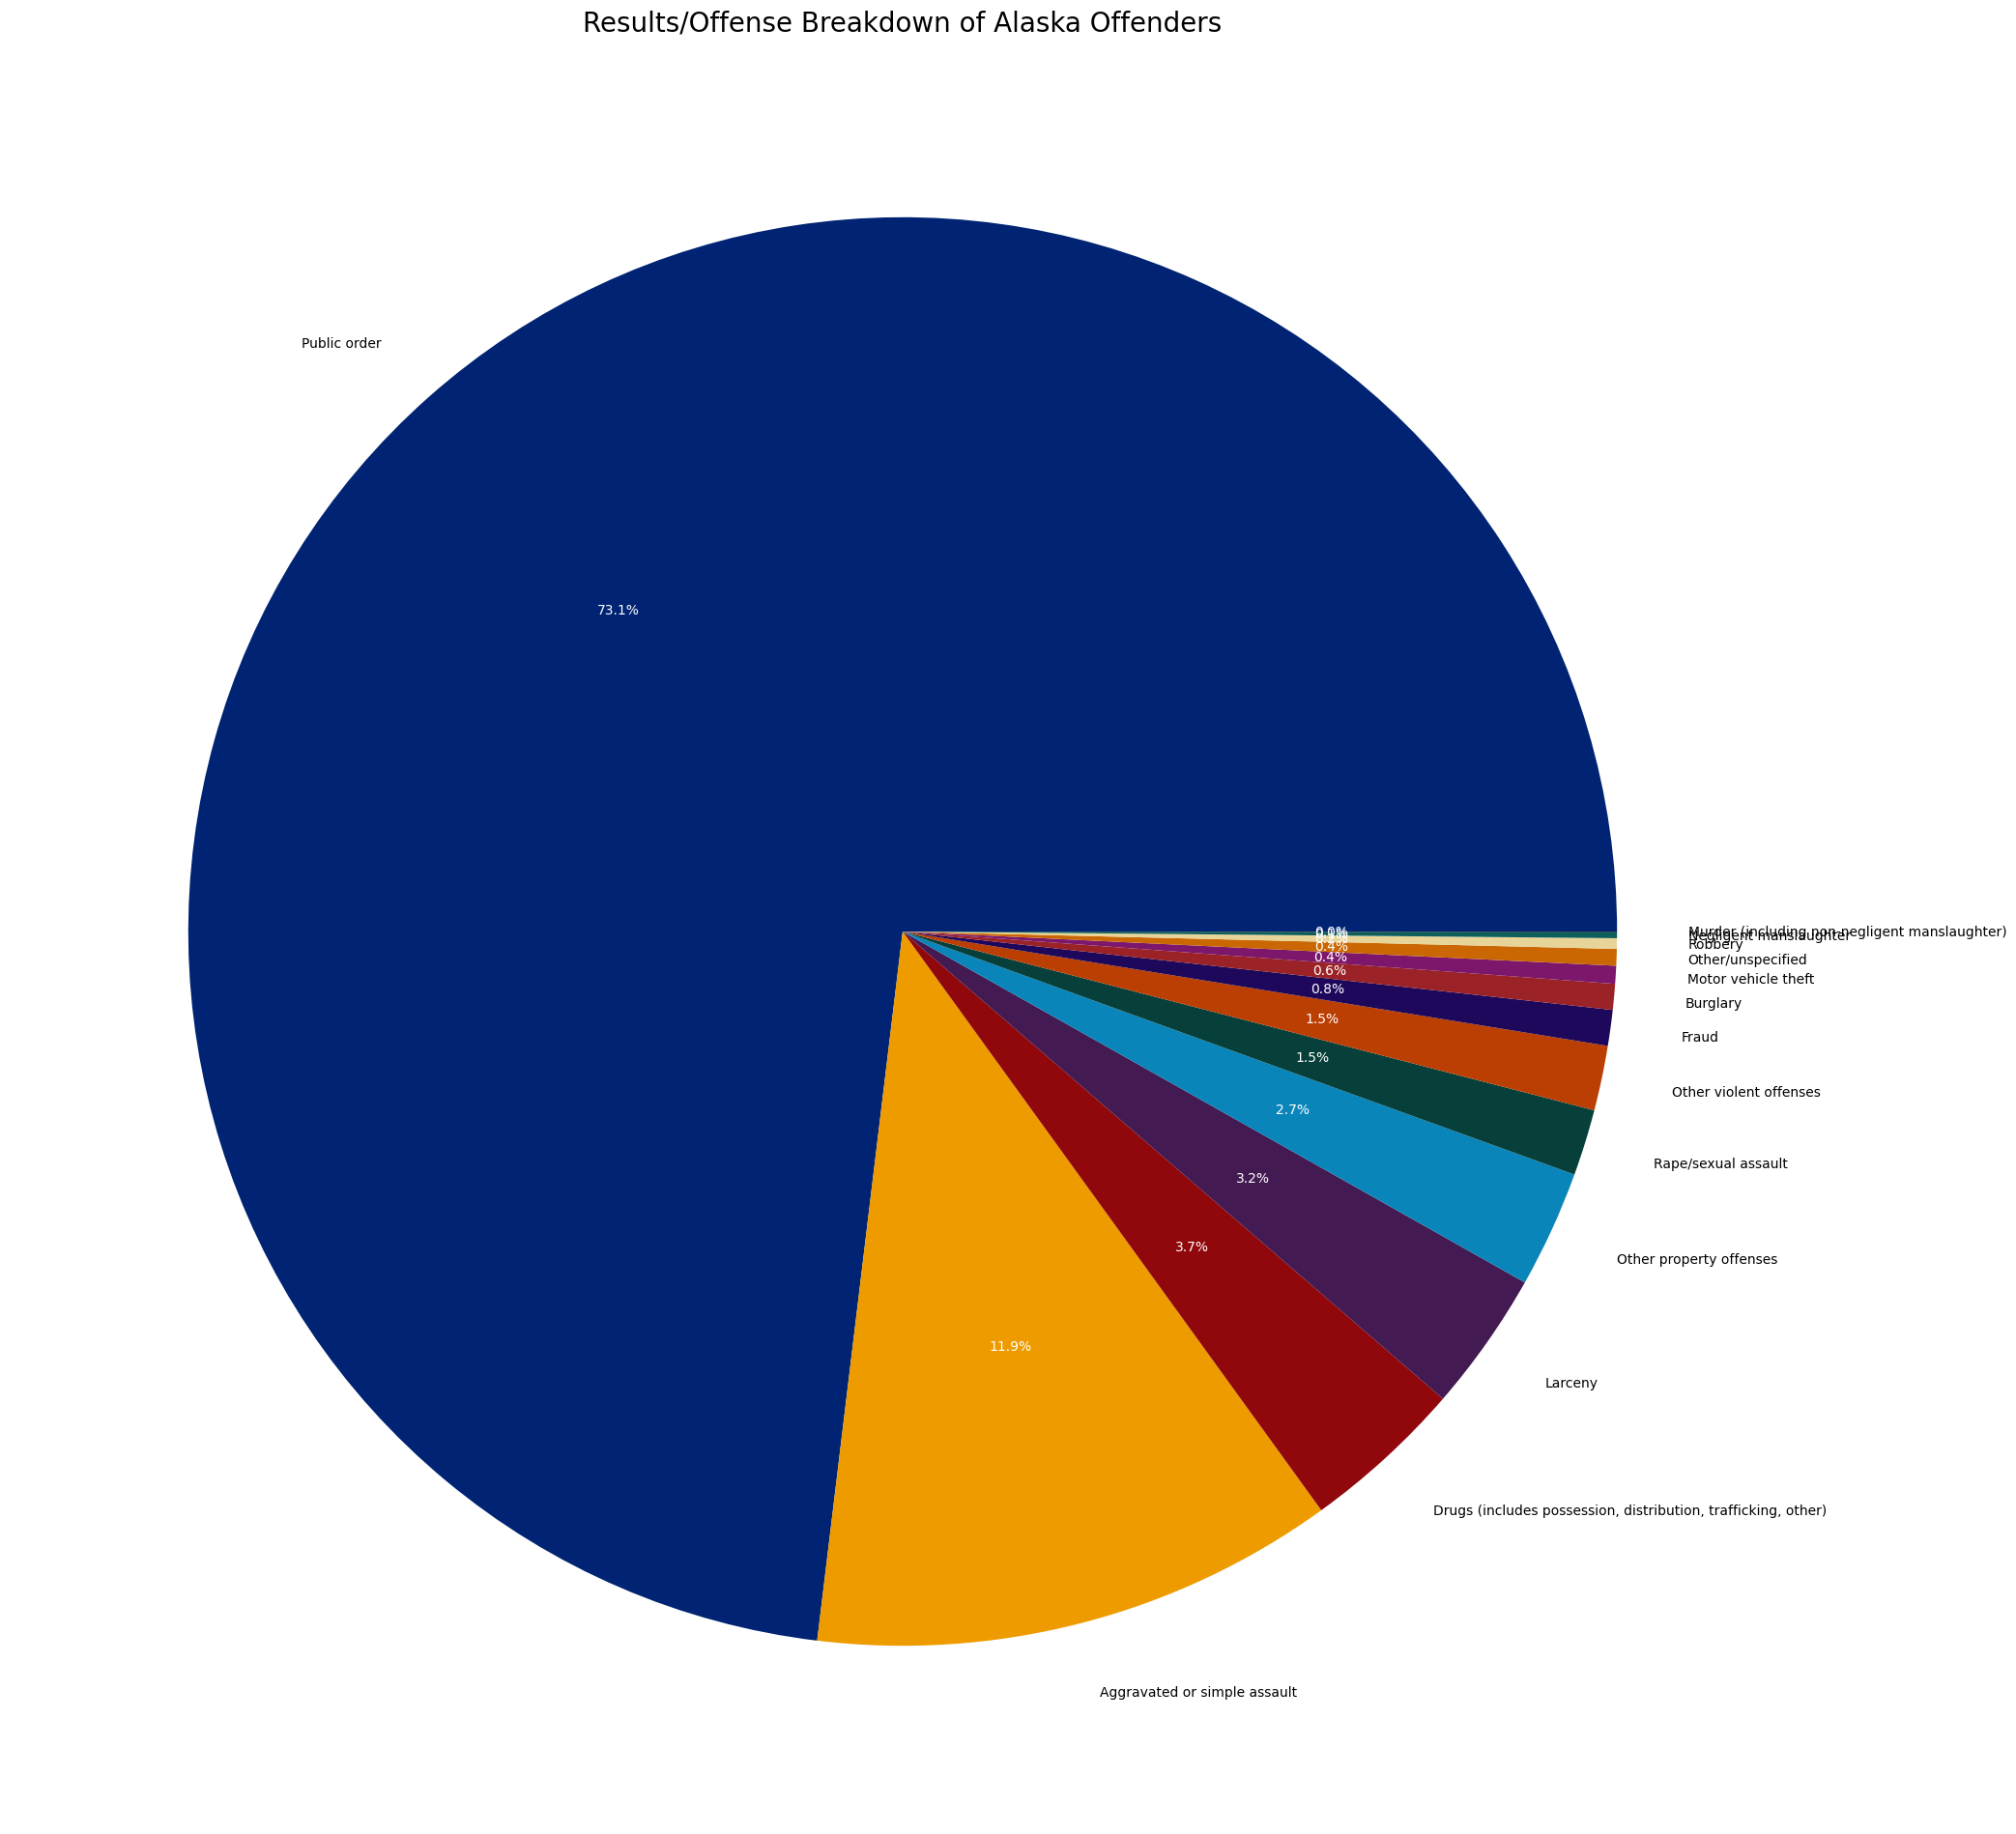

In [227]:
# Mapping dictionaries
offenseMapping = {
    1: 'Murder (including non-negligent manslaughter)',
    2: 'Negligent manslaughter',
    3: 'Rape/sexual assault',
    4: 'Robbery',
    5: 'Aggravated or simple assault',
    6: 'Other violent offenses',
    7: 'Burglary',
    8: 'Larceny',
    9: 'Motor vehicle theft',
    10: 'Fraud',
    11: 'Other property offenses',
    12: 'Drugs (includes possession, distribution, trafficking, other)',
    13: 'Public order',
    14: 'Other/unspecified'
}

stateMapping = {
    1: 'AL',
    2: 'AK',
    4: 'AZ',
    5: 'AR',
    6: 'CA',
    8: 'CO',
    9: 'CT',
    10: 'DE',
    11: 'DC',
    12: 'FL',
    13: 'GA',
    15: 'HI',
    16: 'ID',
    17: 'IL',
    18: 'IN',
    19: 'IA',
    20: 'KS',
    21: 'KY',
    22: 'LA',
    23: 'ME',
    24: 'MD',
    25: 'MA',
    26: 'MI',
    27: 'MN',
    28: 'MS',
    29: 'MO',
    30: 'MT',
    31: 'NE',
    32: 'NV',
    33: 'NH',
    34: 'NJ',
    35: 'NM',
    36: 'NY',
    37: 'NC',
    38: 'ND',
    39: 'OH',
    40: 'OK',
    41: 'OR',
    42: 'PA',
    44: 'RI',
    45: 'SC',
    46: 'SD',
    47: 'TN',
    48: 'TX',
    49: 'UT',
    50: 'VT',
    51: 'VA',
    53: 'WA',
    54: 'WV',
    55: 'WI',
    56: 'WY'
}

# Map the offense and race values to their corresponding labels
one_hot_df['Offense'] = one_hot_df['OFFDETAIL'].map(offenseMapping)
one_hot_df['State'] = one_hot_df['STATE'].map(stateMapping)

# creating a list of state labels in the same order as the sorted state counts
plt.figure(figsize=(24,24))

stateData = one_hot_df[one_hot_df['State'] == 'AK']
offenseCounts = stateData.groupby('Offense').size()
sortedCounts, sortedLabels = zip(*sorted(zip(offenseCounts.values, offenseCounts.index), reverse=True))

_, _, text = plt.pie(sortedCounts, labels=sortedLabels, autopct='%1.1f%%', colors=pie_colors)
for t in text:
    t.set_color('white')

# increase the space between the labels for the smallest columns
plt.title('Results/Offense Breakdown of Alaska Offenders', fontsize=20)
plt.savefig('Results/RaceBreakdownAlaska.png', bbox_inches='tight')



<Figure size 1200x1200 with 0 Axes>

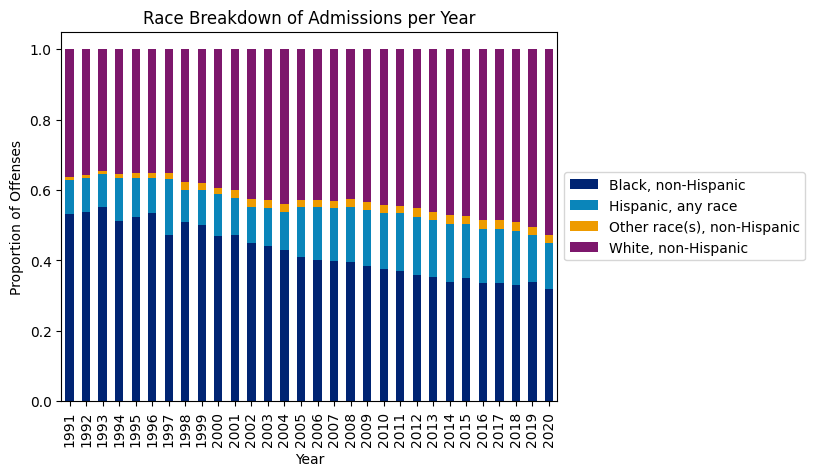

In [258]:
# Group the data by year and race
grouped = one_hot_df.groupby(['ADMITYR', 'Race']).size().unstack(fill_value=0)

# Compute the proportion of each race per year
proportions = grouped.div(grouped.sum(axis=1), axis=0)

plt.figure(figsize=(12,12))
# Plot a stacked bar graph of the proportions
proportions.plot(kind='bar', stacked=True, color=color_map)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Proportion of Offenses')
plt.title('Race Breakdown of Admissions per Year')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Results/RaceBreakdownPerYear.png', bbox_inches='tight')

# Show the graph
plt.show()

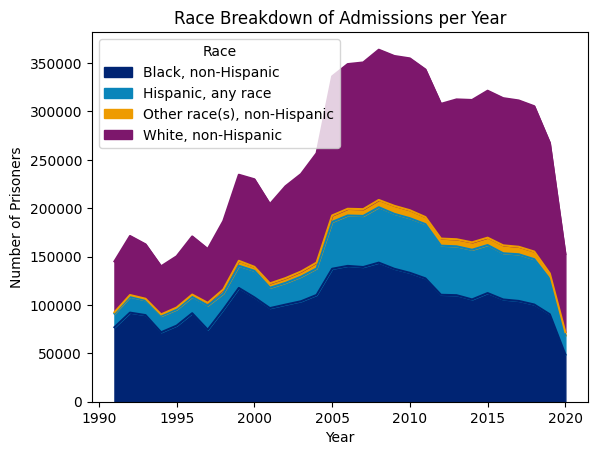

In [259]:
grouped = one_hot_df.groupby(['ADMITYR', 'RACE']).size().unstack(fill_value=0)

mapping = {
        1: 'White, non-Hispanic',
        2: 'Black, non-Hispanic',
        3: 'Hispanic, any race',
        4: 'Other race(s), non-Hispanic'
    }

one_hot_df['Race'] = one_hot_df['RACE'].map(mapping)

# Group the data by year and race
grouped = one_hot_df.groupby(['ADMITYR', 'Race']).size().unstack(fill_value=0)

# Plot a stacked bar graph
grouped.plot.area(color=color_map)

# Set the labels and title
# plt.figure(figsize=(8,8))
plt.xlabel('Year')
plt.ylabel('Number of Prisoners')
plt.title('Race Breakdown of Admissions per Year')
plt.savefig('Results/RaceBreakdownAdmissions.png', bbox_inches='tight')

# Show the graph
plt.show()

